In [ ]:
!nvidia-smi

Mon May 12 18:06:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov11
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov11
 CITATION.cff	   examples	    README.zh-CN.md   yolo11m-obb.pt
 CONTRIBUTING.md   LICENSE	    runs	      yolo11m-pose.pt
 datasets	   markerpen.yaml   test	      yolo11n.pt
 data.yaml	   mkdocs.yml	    tests	      yolov11-keypoints.ipynb
 docker		   pyproject.toml   ultralytics      'yolov11 test.py'
 docs		   README.md	    yolo11l-pose.pt


In [ ]:
#%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
import ultralytics
ultralytics.checks()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolo11l-pose.yaml")  # build a new model from scratch
model = YOLO("yolo11l-pose.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="data.yaml", epochs=300, imgsz=320, patience=0, pose=40.0, kobj=0.5, cache=True)  # train the model

100%|██████████| 50.7M/50.7M [00:01<00:00, 44.1MB/s]


New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=0.5, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=a

train: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpens/train/labels.cache... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 255/255 [00:05<00:00, 44.84it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±0.7 ms, read: 41.6±39.4 MB/s, size: 289.3 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpens/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 58.89it/s]


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 173 weight(decay=0.0), 183 weight(decay=0.0005), 182 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.89G      1.911      15.43       0.43      3.266      2.191         40        320: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20         20      0.764       0.65      0.707      0.502      0.647       0.55      0.535     0.0992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.09G      1.196      8.978     0.4145      1.151      1.393         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         20         20     0.0435       0.05    0.00967    0.00305     0.0161       0.05    0.00413    0.00121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/300      3.25G      1.316      7.286     0.3833      1.153       1.43         38        320: 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.26G      1.437      5.856      0.345       1.21      1.527         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/300      3.28G      1.529      6.379      0.323      1.344      1.586         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/300      3.41G      1.442      5.942     0.3112      1.274      1.561         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/300      3.55G      1.394      6.125     0.3083      1.206      1.507         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.55G      1.396      5.661     0.3084      1.136      1.482         36        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all         20         20          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.55G      1.326      5.267     0.3191      1.122      1.459         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         20         20      0.514        0.7      0.675      0.496      0.317        0.8        0.5      0.109

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.55G      1.366      5.435     0.3013      1.191      1.473         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         20      0.333       0.45      0.255     0.0909      0.481       0.65      0.535      0.165



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.55G      1.295      6.382     0.2947      1.077      1.414         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         20       0.51       0.75      0.526      0.284      0.415       0.65       0.36      0.077



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.55G       1.33       5.03     0.3092      1.128      1.442         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         20         20      0.786       0.55      0.684      0.415      0.264        0.5      0.211     0.0399



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.55G      1.261      5.458      0.311      1.048      1.389         38        320: 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


                   all         20         20      0.707        0.9      0.864      0.667      0.584       0.75      0.581      0.204

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.55G      1.221      5.074     0.3079      1.004      1.349         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         20        0.9        0.9      0.924       0.68      0.648       0.65      0.537      0.128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/300      3.55G      1.286      5.168     0.3014      1.055      1.401         33        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         20      0.959       0.85      0.905      0.694      0.926        0.8      0.836      0.282



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/300      3.55G      1.276      4.752     0.3041       1.07      1.426         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all         20         20      0.726        0.6      0.698      0.419      0.556        0.6      0.583      0.201

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/300      3.55G      1.187      4.877     0.2955     0.9798      1.366         34        320: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         20      0.576        0.7      0.654      0.404      0.536       0.65      0.515      0.132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/300      3.55G      1.168      4.992     0.2862     0.9652      1.347         30        320: 100%|██████████| 16/16 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         20         20      0.759       0.85      0.829      0.547      0.698       0.65      0.714      0.226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.55G       1.21      5.083     0.2854      1.024      1.339         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20       0.44        0.3      0.275      0.147      0.402       0.55      0.422       0.13



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.55G      1.136       4.86     0.2821     0.9931      1.335         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20         20      0.514       0.65      0.623      0.389      0.553        0.6      0.624      0.213



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/300      3.55G      1.079      4.381     0.2743     0.9181       1.28         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all         20         20      0.574       0.95       0.83      0.687      0.761        0.5      0.697      0.253



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.55G      1.114      4.327     0.2758     0.9427      1.302         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         20         20      0.933        0.8      0.944      0.726      0.874      0.696      0.796      0.308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.55G      1.112      4.526     0.2763     0.9067      1.295         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         20         20      0.875       0.95      0.962       0.77      0.686       0.75      0.734      0.282



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/300      3.55G      1.134      4.271     0.2786     0.9564      1.343         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         20         20      0.999          1      0.995      0.827      0.847       0.85      0.775      0.292

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.55G      1.076      4.356     0.2737     0.8763       1.31         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         20         20      0.989       0.95      0.993      0.806      0.754      0.767      0.688       0.23



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.55G      1.129      4.264     0.2689     0.9057      1.323         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20      0.891       0.95      0.965      0.801      0.749        0.8      0.776      0.273



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/300      3.55G      1.048        4.4     0.2643     0.8508      1.259         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         20         20      0.493       0.25      0.249      0.115      0.478      0.734      0.574      0.204



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.55G      1.088      4.472     0.2615     0.8802      1.291         32        320: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         20          1      0.949      0.979      0.824      0.773        0.7      0.648      0.279



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.55G      1.018      3.966     0.2639     0.8527      1.255         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         20         20      0.859      0.913      0.961      0.855      0.713       0.75      0.652      0.239



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.55G      1.034      4.197     0.2623     0.8424       1.24         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         20         20      0.971       0.95      0.982      0.823      0.699        0.7      0.627        0.2



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.55G      1.041      4.009     0.2488     0.8587      1.278         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20      0.903      0.936      0.955      0.795      0.601      0.753      0.566      0.174



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.55G      1.049       3.65     0.2644     0.8825      1.277         42        320: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         20      0.936       0.95      0.984      0.831      0.736        0.9      0.812      0.284



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.55G     0.9983      3.705     0.2492     0.8138      1.246         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20         20      0.842      0.802      0.921      0.778      0.715      0.879      0.849      0.281



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/300      3.55G      1.023      3.913     0.2464     0.8547      1.256         28        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         20          1      0.995      0.995      0.864       0.82       0.85       0.81      0.304



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/300      3.55G     0.9509      3.612     0.2456     0.7829        1.2         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20         20      0.942       0.95       0.99      0.811      0.775        0.8      0.747      0.267



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/300      3.55G     0.9828      3.599     0.2417     0.8216      1.205         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         20      0.868       0.99      0.976      0.859      0.701       0.75      0.633      0.256



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/300      3.55G      0.981      3.361      0.255     0.8321      1.258         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         20      0.982        0.9      0.978      0.874      0.688        0.6      0.541      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/300      3.55G     0.9651      3.812     0.2443     0.8244      1.231         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         20      0.996       0.95      0.977      0.834      0.773       0.75      0.682       0.23



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/300      3.55G     0.9755      3.565     0.2438     0.8145      1.225         36        320: 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20      0.716      0.504      0.606      0.404      0.556        0.6      0.536      0.238



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/300      3.55G     0.9586      3.589     0.2398     0.7871      1.227         32        320: 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         20         20          1      0.997      0.995      0.836      0.814        0.8      0.765      0.376



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/300      3.55G     0.9686      3.355     0.2379      0.839      1.217         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         20      0.906          1      0.985      0.851      0.724        0.8      0.768      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/300      3.55G     0.9801      3.063      0.237      0.829      1.235         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20      0.997          1      0.995      0.903      0.897        0.9      0.897      0.548



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/300      3.55G     0.9011      2.865     0.2406     0.7571       1.19         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         20      0.896       0.95      0.966      0.795      0.808       0.85      0.893       0.44



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/300      3.55G     0.9083      3.188     0.2428     0.7685      1.183         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         20         20      0.999          1      0.995      0.863      0.847       0.85      0.812      0.492



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/300      3.55G     0.8994      2.625     0.2527     0.7645      1.176         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20      0.903       0.95      0.976      0.844       0.76        0.8      0.765        0.5



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/300      3.55G     0.8808      2.574     0.2545     0.7665      1.168         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20         20      0.908       0.99      0.986      0.865      0.802       0.85      0.842      0.554



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/300      3.55G     0.8923      2.142     0.2499     0.7821      1.226         27        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         20         20      0.997          1      0.995      0.886      0.897        0.9      0.912      0.595



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/300      3.55G     0.8388      1.897     0.2436     0.7482      1.158         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         20         20      0.998          1      0.995      0.855      0.896        0.9      0.888      0.604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/300      3.55G     0.8903       2.06     0.2378     0.7166      1.181         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.974          1      0.995      0.876      0.974          1      0.995      0.743



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/300      3.55G     0.8928      2.091     0.2444     0.7837      1.192         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         20         20      0.839      0.785      0.825      0.507      0.847        0.9      0.926      0.696



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.55G      0.964       2.05     0.2472     0.7962      1.228         30        320: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         20         20      0.849       0.95      0.931      0.711      0.788       0.95       0.93      0.718



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/300      3.55G     0.8871      2.313     0.2364     0.7267      1.143         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         20         20      0.949          1       0.99       0.84      0.833      0.997      0.947      0.806



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.55G     0.8881      1.625     0.2389     0.7368      1.175         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         20      0.909      0.999      0.986      0.851      0.909      0.999      0.986      0.857



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.55G     0.8582      1.473     0.2249     0.7346      1.169         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20         20      0.328        0.4      0.277      0.163      0.638       0.65      0.582      0.292



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.55G     0.8824       1.84     0.2296     0.7294      1.166         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         20         20          1       0.94       0.99      0.868          1       0.94       0.99      0.785



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.55G     0.8297       1.63     0.2315     0.7226       1.14         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         20         20          1      0.999      0.995      0.912        0.9        0.9      0.885      0.654

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.55G     0.8574      1.418     0.2227     0.7485      1.165         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


                   all         20         20      0.993          1      0.995      0.895      0.993          1      0.995      0.791

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/300      3.71G     0.8232      1.445     0.2356     0.7256      1.143         36        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all         20         20       0.95          1      0.993      0.893      0.902       0.95      0.945      0.796

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/300      3.71G     0.8476      1.586     0.2234      0.712      1.148         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         20      0.949      0.931      0.983      0.876      0.949      0.931      0.983      0.872



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/300      3.71G     0.8246      1.542     0.2252     0.7318      1.164         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         20         20      0.936          1       0.99      0.899      0.886       0.95      0.923      0.793



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/300      3.71G     0.8519      1.629     0.2307     0.7592      1.178         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20      0.832      0.993      0.961      0.845      0.856       0.89      0.904      0.829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/300      3.71G     0.8475      1.435     0.2198     0.7303      1.159         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         20         20      0.984       0.95      0.993      0.883      0.932        0.9      0.929      0.745



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/300      3.71G     0.8069      1.268     0.2149     0.7072       1.12         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         20      0.988       0.95      0.988       0.86      0.988       0.95      0.988      0.885



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/300      3.71G     0.8334      1.469     0.2177      0.731       1.15         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         20         20      0.996          1      0.995      0.912      0.996          1      0.995      0.909



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/300      3.71G     0.7896      1.373     0.2101     0.6954      1.116         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         20         20      0.995          1      0.995       0.88      0.995          1      0.995      0.929

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/300      3.71G     0.8741      1.063     0.2109     0.7356      1.182         35        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20      0.949       0.95       0.99      0.893      0.949       0.95       0.99      0.951



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/300      3.71G     0.8058      1.218     0.2074     0.6745      1.155         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         20         20      0.908      0.989       0.99      0.868      0.908      0.989       0.99      0.898



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/300      3.71G     0.7937      1.143     0.2139      0.657      1.105         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20          1      0.994      0.995      0.877          1      0.994      0.995      0.963



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/300      3.71G     0.8142      1.327     0.2056     0.6967      1.114         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         20         20      0.991       0.95       0.99      0.899      0.991       0.95       0.99      0.959



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/300      3.71G     0.7989      1.396      0.206     0.6888      1.137         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         20      0.995          1      0.995      0.909      0.995          1      0.995       0.95



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/300      3.71G     0.7714      1.308     0.2103     0.6621      1.118         23        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         20          1      0.985      0.995      0.917          1      0.985      0.995      0.935



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/300      3.71G     0.7469     0.9678     0.1961     0.6562      1.109         32        320: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         20         20          1      0.994      0.995       0.91          1      0.994      0.995      0.914



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/300      3.71G     0.8091      1.345     0.2053     0.6656      1.126         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         20         20      0.949          1      0.993      0.917      0.949          1      0.993       0.97



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/300      3.71G     0.8304       1.35     0.2105     0.6914      1.167         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         20         20          1      0.996      0.995      0.893          1      0.996      0.995      0.943



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/300      3.71G     0.7729      1.085     0.2018     0.6925       1.12         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         20         20          1      0.999      0.995      0.923          1      0.999      0.995       0.91



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/300      3.71G     0.7323      1.158     0.1857     0.6222      1.092         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         20         20      0.997          1      0.995      0.912      0.997          1      0.995       0.86



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/300      3.71G     0.7888      1.399     0.1929     0.6719      1.102         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         20         20      0.945          1      0.993      0.919      0.897       0.95      0.933      0.899



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/300      3.71G     0.7563      1.417     0.1949     0.6399        1.1         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         20         20      0.957       0.95       0.99      0.899      0.957       0.95       0.99      0.953



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/300      3.71G     0.7923      1.157     0.2098     0.6843      1.141         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20          1      0.982      0.995      0.901          1      0.982      0.995      0.928



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/300      3.71G     0.7491      1.068     0.1856     0.6332      1.108         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         20         20      0.997          1      0.995      0.897      0.997          1      0.995      0.915



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/300      3.71G     0.7283      1.027     0.1937     0.6422      1.084         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         20         20      0.947          1      0.993       0.88      0.947          1      0.993      0.953



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/300      3.71G     0.7348      1.088     0.1999     0.6603      1.089         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         20         20      0.885          1      0.978      0.688      0.885          1      0.974      0.903

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/300      3.71G     0.7829      1.335     0.1911     0.6676       1.08         28        320: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         20         20      0.994          1      0.995      0.876      0.994          1      0.995      0.942



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.71G     0.7242     0.9139     0.1857     0.6166      1.098         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         20         20      0.948          1      0.993      0.914      0.948          1      0.993      0.935



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/300      3.71G     0.7549     0.9991     0.1907     0.6675      1.105         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20         20      0.997          1      0.995      0.916      0.997          1      0.995      0.982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/300      3.71G     0.7418      1.029     0.1864     0.6279      1.095         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         20      0.997          1      0.995      0.905      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/300      3.71G     0.7704     0.9737     0.1936      0.643      1.114         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         20      0.952      0.996      0.993      0.895      0.952      0.996      0.993      0.956



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/300      3.71G     0.7116     0.8132     0.1873     0.6045      1.096         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20         20      0.997          1      0.995      0.915      0.997          1      0.995      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/300      3.71G     0.7307     0.9788     0.1832     0.6653      1.105         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         20         20      0.998          1      0.995      0.941      0.998          1      0.995      0.908



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/300      3.71G     0.7032     0.9451     0.1736     0.6474      1.076         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         20         20       0.95          1      0.993      0.949       0.95          1      0.993      0.952



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/300      3.71G     0.7246      0.947     0.1812     0.6273      1.089         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         20         20          1      0.998      0.995      0.954          1      0.998      0.995      0.969



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/300      3.71G     0.7368      1.048     0.1781     0.6246      1.094         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         20         20      0.997          1      0.995      0.946      0.997          1      0.995      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/300      3.71G     0.6956      1.108     0.1707     0.5929      1.077         47        320: 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         20         20      0.997          1      0.995      0.874      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.71G     0.7028      0.947     0.1717     0.6164      1.094         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20         20      0.996          1      0.995      0.941      0.996          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.71G     0.7276      1.005     0.1705     0.6127      1.079         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         20      0.997          1      0.995       0.91      0.997          1      0.995       0.97



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.71G      0.739     0.9371     0.1709      0.655      1.112         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         20         20      0.783        0.6      0.743      0.468      0.837      0.771       0.84      0.676

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.71G     0.8104      1.062     0.1768     0.6535      1.159         37        320: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         20      0.986       0.95      0.993        0.9      0.986       0.95      0.993      0.969



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.71G     0.7173     0.9702     0.1721     0.6428      1.098         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         20         20          1      0.979      0.995      0.938          1      0.979      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/300      3.71G     0.7019     0.8211     0.1625       0.62      1.071         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         20         20      0.999          1      0.995      0.949      0.999          1      0.995      0.951



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/300      3.71G     0.6831     0.6896     0.1642     0.5893      1.087         37        320: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         20         20      0.951          1      0.993       0.87      0.951          1      0.993      0.964



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.71G     0.6956     0.8352     0.1581      0.591      1.095         33        320: 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         20      0.948          1      0.993      0.944      0.948          1      0.993      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/300      3.71G     0.7097      0.707     0.1561     0.5878      1.107         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         20         20      0.949          1      0.993      0.961      0.949          1      0.993      0.943



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/300      3.71G     0.7209     0.8595     0.1615     0.6186      1.082         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         20       0.95          1      0.988      0.941       0.95          1      0.988      0.947



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/300      3.71G     0.7199     0.6507     0.1551     0.6157      1.083         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         20         20      0.952      0.989      0.978      0.862      0.952      0.989      0.978      0.969

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.71G     0.7209     0.7776     0.1486     0.5834      1.079         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.838       0.75      0.854      0.747       0.73       0.95      0.895      0.837



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.71G     0.7323     0.7366     0.1575     0.6411      1.095         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         20         20      0.949          1      0.993      0.914      0.949          1      0.993      0.949



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.71G     0.7336     0.7855     0.1529     0.6242      1.118         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         20         20      0.947          1      0.993      0.938      0.947          1      0.993      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/300      3.71G     0.7154     0.8651     0.1514     0.6367        1.1         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         20          1      0.986      0.995      0.918          1      0.986      0.995      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.71G     0.6994     0.7821     0.1461     0.6054      1.064         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         20         20          1      0.998      0.995      0.928          1      0.998      0.995      0.944



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.71G     0.7259     0.7294     0.1473      0.637      1.082         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         20         20      0.998          1      0.995      0.898      0.998          1      0.995      0.913



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/300      3.71G     0.6855     0.8549     0.1366      0.594      1.061         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         20         20      0.999          1      0.995      0.925      0.898        0.9      0.902      0.872



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.71G     0.7283     0.8302     0.1469     0.6206      1.107         28        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20          1      0.985      0.995      0.962      0.949      0.935       0.95      0.849



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.71G     0.6559     0.8037     0.1405     0.5733      1.046         51        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20         20          1      0.938       0.99      0.952          1      0.938       0.99      0.905



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.71G     0.6846     0.7583     0.1312     0.5914      1.077         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         20      0.952      0.997      0.993      0.933      0.952      0.997      0.993      0.986



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/300      3.71G      0.678     0.6997     0.1368     0.5617       1.06         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.952      0.996      0.993      0.947      0.952      0.996      0.993      0.993



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.71G     0.6574     0.7649      0.134     0.5891      1.057         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         20       0.95          1      0.993      0.947       0.95          1      0.993      0.982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.71G     0.6482       0.76     0.1298     0.5747      1.069         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20         20          1          1      0.995      0.951          1          1      0.995       0.96



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.71G      0.658     0.7798     0.1356      0.578      1.076         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         20         20      0.946          1      0.993      0.945      0.946          1      0.993      0.965



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/300      3.71G     0.6553      0.695     0.1421      0.576      1.055         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         20         20      0.947          1      0.993      0.932      0.947          1      0.993      0.969



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/300      3.71G     0.6676     0.7768     0.1365     0.5816      1.077         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         20         20      0.999          1      0.995      0.937      0.999          1      0.995      0.975

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.71G     0.6666     0.9291      0.132     0.5848      1.071         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all         20         20      0.951          1      0.993      0.935      0.951          1      0.993      0.931

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/300      3.71G     0.6805     0.7765     0.1336     0.5755      1.076         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         20      0.942       0.95      0.988      0.936      0.942       0.95      0.988      0.972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/300      3.71G     0.6642     0.6449     0.1394     0.5501      1.071         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         20         20      0.951          1      0.993      0.935      0.951          1      0.993      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/300      3.71G     0.6362     0.6891     0.1151      0.549      1.041         31        320: 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         20         20       0.95          1      0.993      0.947       0.95          1      0.993      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/300      3.71G     0.6858     0.4913     0.1182     0.5947      1.078         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         20         20       0.95          1      0.983      0.927       0.95          1      0.983      0.953



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/300      3.71G     0.6582     0.8284     0.1199     0.5769      1.053         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         20         20      0.948          1      0.985      0.939      0.948          1      0.985      0.972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/300      3.71G     0.6817     0.7011     0.1277     0.6085      1.082         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         20         20      0.949          1      0.993      0.947      0.949          1      0.993      0.984

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/300      3.71G     0.6588     0.6828     0.1107      0.576      1.069         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20       0.95          1      0.993      0.943       0.95          1      0.993      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/300      3.71G     0.6382     0.6858     0.1159     0.5651      1.034         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         20      0.952      0.998      0.993      0.963      0.952      0.998      0.993      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/300      3.71G     0.6399       0.64     0.1273     0.5625      1.041         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         20      0.998          1      0.995      0.966      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/300      3.71G     0.6434     0.5761     0.1214     0.5582      1.071         33        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         20         20      0.998          1      0.995       0.96      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/300      3.71G      0.632     0.6543     0.1024     0.5555      1.041         35        320: 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         20         20          1      0.998      0.995      0.944          1      0.998      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/300      3.71G     0.6432     0.8065     0.1102      0.559      1.041         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         20      0.949          1      0.993      0.948      0.949          1      0.993      0.962



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/300      3.71G     0.6683     0.6254     0.1197     0.5874       1.08         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         20         20      0.998          1      0.995      0.931      0.998          1      0.995      0.938



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/300      3.71G      0.605     0.6439     0.1139     0.5374      1.037         26        320: 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         20         20      0.949          1      0.993      0.922      0.949          1      0.993      0.976

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/300      3.71G     0.6431     0.6928     0.1107     0.5535      1.039         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         20         20      0.949          1      0.993      0.965      0.949          1      0.993      0.976



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/300      3.71G     0.6065     0.5567     0.1125     0.5183      1.025         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.998          1      0.995      0.942      0.998          1      0.995      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.71G     0.6302     0.6316     0.1164     0.5425       1.07         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


                   all         20         20      0.997          1      0.995      0.928      0.997          1      0.995      0.973

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.71G     0.6436     0.6091     0.1097     0.5454      1.038         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20         20      0.997          1      0.995      0.949      0.997          1      0.995      0.972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.71G     0.6532     0.6036      0.117     0.5614      1.076         43        320: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         20         20      0.996          1      0.995      0.918      0.996          1      0.995       0.97



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.71G     0.6176     0.6674     0.1166     0.5476      1.036         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         20      0.997          1      0.995      0.968      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.71G     0.6334     0.5604     0.1097     0.5304      1.062         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20      0.997          1      0.995      0.956      0.997          1      0.995      0.921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.71G     0.6186     0.5105     0.1056     0.5337      1.043         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         20      0.998          1      0.995       0.97      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.71G     0.6231     0.5712     0.1141     0.5397      1.047         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20      0.998          1      0.995      0.949      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.71G     0.6226     0.6026     0.1031     0.5443      1.028         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20         20      0.997          1      0.995       0.95      0.997          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/300      3.71G     0.6389     0.6869     0.1135     0.5523      1.053         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20       0.95          1      0.993      0.993       0.95          1      0.993      0.963



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/300      3.71G     0.5784     0.5988     0.1062     0.5164      1.018         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         20         20       0.95          1      0.993      0.966       0.95          1      0.993      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/300      3.71G     0.6225     0.6313     0.1134     0.5353      1.047         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20      0.948          1      0.993      0.936      0.948          1      0.993      0.993



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/300      3.71G     0.5953     0.5355    0.09742     0.5237      1.026         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         20         20          1      0.996      0.995      0.928          1      0.996      0.995      0.963



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/300      3.71G     0.6125     0.5482    0.09893     0.5254      1.023         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         20         20      0.949          1      0.993      0.954      0.949          1      0.993       0.96



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/300      3.71G     0.6318     0.5558     0.1092     0.5468      1.043         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         20         20      0.948          1      0.993      0.927      0.948          1      0.993      0.962

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/300      3.71G     0.5689     0.5986     0.0965     0.5213      1.013         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         20       0.95          1      0.993      0.955       0.95          1      0.993      0.983



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.71G      0.602     0.5871    0.09797     0.5248      1.042         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20       0.95          1      0.993      0.964       0.95          1      0.993      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/300      3.71G      0.614     0.5136     0.1074     0.5443      1.051         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all         20         20      0.949          1      0.993      0.931      0.949          1      0.993      0.984

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/300      3.71G     0.6036     0.4069    0.09334     0.5397      1.038         44        320: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         20         20      0.947          1      0.993      0.927      0.947          1      0.993      0.973

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/300      3.71G     0.5676     0.4898     0.1005     0.5231      1.021         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         20      0.948          1       0.99      0.927      0.948          1       0.99      0.958



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/300      3.71G     0.5816     0.4554    0.09312     0.5033      1.016         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         20         20       0.95          1       0.99      0.952       0.95          1       0.99      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/300      3.71G     0.5928     0.5497     0.1002      0.526      1.024         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         20         20      0.996          1      0.995      0.957      0.996          1      0.995      0.979

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/300      3.71G     0.6094      0.596      0.106     0.5426      1.032         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         20         20      0.997          1      0.995      0.936      0.997          1      0.995      0.979



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/300      3.71G     0.6327      0.607    0.09968     0.5379      1.052         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         20          1      0.989      0.995      0.959          1      0.989      0.995       0.95



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/300      3.71G     0.6009     0.5514    0.09878     0.5387      1.028         44        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         20          1       0.99      0.995      0.957          1       0.99      0.995      0.944



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/300      3.71G      0.581      0.598    0.09663     0.5269      1.023         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20          1      0.987      0.995      0.965          1      0.987      0.995      0.916



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/300      3.71G     0.5996     0.6029     0.0921       0.51      1.038         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         20         20       0.95          1       0.99      0.956       0.95          1       0.99      0.978



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/300      3.71G     0.6321      0.553    0.08825     0.5549      1.067         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         20         20       0.95          1       0.99      0.957       0.95          1       0.99      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/300      3.71G      0.584     0.4581    0.09098     0.5093      1.015         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         20         20       0.95          1       0.99      0.951       0.95          1       0.99      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/300      3.71G     0.5407     0.4996    0.08623     0.4837      1.005         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         20         20       0.95          1      0.993       0.95       0.95          1      0.993      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/300      3.71G     0.5836     0.3171    0.08484     0.5038      1.047         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         20      0.998          1      0.995      0.952      0.998          1      0.995      0.974



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/300      3.71G     0.5607     0.4982       0.09     0.4776      1.024         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         20      0.998          1      0.995      0.956      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/300      3.71G     0.5861     0.4393    0.08352     0.5087      1.021         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         20         20      0.998          1      0.995      0.969      0.998          1      0.995      0.979



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/300      3.71G     0.5651      0.392    0.08265     0.5156      1.004         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         20      0.998          1      0.995      0.974      0.998          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/300      3.71G     0.5284     0.4884    0.07019     0.4648     0.9942         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         20      0.998          1      0.995      0.966      0.998          1      0.995      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.71G     0.5265     0.4031    0.08668     0.4583      1.008         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         20         20      0.997          1      0.995      0.968      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/300      3.71G     0.5878     0.4338    0.09067     0.5061      1.034         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         20         20       0.95          1      0.993      0.967       0.95          1      0.993      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/300      3.71G     0.5675     0.3784    0.08351     0.5022      1.019         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         20       0.95          1      0.993      0.956       0.95          1      0.993       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/300      3.71G      0.603     0.4036    0.08833     0.5275      1.032         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         20         20       0.95          1      0.993      0.971       0.95          1      0.993      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/300      3.71G     0.5889     0.4559    0.09251     0.5075      1.026         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         20       0.95          1      0.993      0.962       0.95          1      0.993      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/300      3.71G     0.5311     0.5068    0.08607     0.4775      1.014         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         20      0.998          1      0.995      0.969      0.998          1      0.995      0.957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/300      3.71G       0.57     0.3485    0.08962     0.5111      1.018         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/300      3.71G     0.5373      0.407    0.08169     0.4878     0.9852         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         20      0.998          1      0.995      0.976      0.998          1      0.995      0.982



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/300      3.71G     0.5417     0.3635    0.09072     0.4776       1.01         28        320: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/300      3.71G     0.5481     0.4603    0.09814     0.4919      1.015         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         20         20      0.998          1      0.995      0.972      0.998          1      0.995      0.976

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.71G     0.5613     0.4317    0.08619      0.503      1.005         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         20         20      0.998          1      0.995      0.967      0.998          1      0.995      0.977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.71G     0.5497     0.2924    0.08891     0.4714      1.006         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         20         20      0.998          1      0.995      0.986      0.998          1      0.995      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.71G     0.5377     0.3751     0.0787      0.481      1.021         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/300      3.71G      0.528     0.4405    0.09192      0.479      1.004         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         20         20      0.999          1      0.995      0.973      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.71G     0.5469      0.374    0.07831     0.4895      1.003         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         20         20      0.998          1      0.995      0.957      0.998          1      0.995      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.71G     0.5274     0.3441    0.08461     0.4804      1.009         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         20         20      0.998          1      0.995       0.98      0.998          1      0.995      0.982

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.71G     0.5276     0.4337    0.08167     0.4532      1.002         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         20         20      0.998          1      0.995      0.979      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.71G     0.5204     0.3424    0.08032     0.4567     0.9906         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         20      0.998          1      0.995      0.972      0.998          1      0.995      0.983



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.71G     0.4979     0.3131    0.07725     0.4584     0.9867         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         20      0.998          1      0.995       0.98      0.998          1      0.995      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.71G     0.5178     0.3369     0.0771     0.4752      1.002         32        320: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20         20      0.997          1      0.995      0.965      0.997          1      0.995      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.71G     0.5026     0.4671    0.08571     0.4437     0.9869         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all         20         20      0.998          1      0.995      0.978      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.71G     0.5361     0.3811    0.08151     0.4805      1.009         37        320: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.71G     0.5287     0.4099    0.07524     0.4469     0.9995         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         20         20      0.997          1      0.995      0.974      0.997          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.71G     0.4857     0.4562    0.07837       0.45     0.9761         32        320: 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         20         20      0.997          1      0.995      0.957      0.997          1      0.995      0.975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.71G     0.5274     0.3111    0.08732     0.4656      1.009         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         20      0.997          1      0.995      0.972      0.997          1      0.995      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.71G     0.5373     0.3321    0.08228     0.4716      1.003         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         20         20      0.998          1      0.995      0.964      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.71G     0.5353     0.4491    0.08563     0.4781     0.9879         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         20      0.996          1      0.995      0.968      0.996          1      0.995      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/300      3.71G      0.559     0.5277     0.0946     0.4802      1.029         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         20         20      0.997          1      0.995      0.968      0.997          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/300      3.71G      0.543     0.3343    0.08206     0.4629      1.019         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         20         20      0.997          1      0.995      0.984      0.997          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.71G     0.5223     0.3978    0.07764     0.4684      1.003         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]

                   all         20         20      0.997          1      0.995      0.976      0.997          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.71G     0.4866     0.2822     0.0758     0.4492     0.9781         27        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         20         20      0.997          1      0.995      0.968      0.997          1      0.995      0.989

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.71G     0.5239     0.2966    0.08435     0.4597      1.005         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all         20         20      0.997          1      0.995      0.957      0.997          1      0.995      0.988

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    204/300      3.71G     0.5111     0.2949    0.07821     0.4666      0.989         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all         20         20      0.997          1      0.995      0.972      0.997          1      0.995      0.988

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    205/300      3.71G     0.5395     0.3369    0.07683     0.4795     0.9971         46        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


                   all         20         20      0.998          1      0.995      0.975      0.998          1      0.995      0.989

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    206/300      3.71G     0.4942     0.3222    0.07164     0.4363     0.9742         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    207/300      3.71G     0.4882      0.317    0.07312     0.4314     0.9926         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         20         20      0.998          1      0.995      0.976      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    208/300      3.71G     0.5049     0.3942    0.07978     0.4679      1.005         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         20         20      0.998          1      0.995      0.969      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    209/300      3.71G     0.5176     0.3868    0.08571     0.4464       1.01         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         20      0.998          1      0.995      0.974      0.998          1      0.995      0.976



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    210/300      3.71G     0.5205      0.411    0.08674     0.4534     0.9947         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         20         20      0.998          1      0.995      0.946      0.998          1      0.995      0.981



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    211/300      3.71G     0.5241     0.4049     0.0745     0.4575      1.003         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all         20         20      0.997          1      0.995      0.947      0.997          1      0.995      0.981

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    212/300      3.71G     0.5182     0.3786    0.07447     0.4634     0.9947         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         20         20      0.998          1      0.995      0.964      0.998          1      0.995      0.978

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    213/300      3.71G     0.5299     0.3413    0.07391     0.4671      1.018         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20         20          1      0.999      0.995      0.972          1      0.999      0.995      0.974



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    214/300      3.71G     0.4575     0.3575    0.08136     0.4229     0.9576         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


                   all         20         20      0.999          1      0.995      0.976      0.999          1      0.995      0.971

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    215/300      3.71G     0.4979     0.2924    0.07358     0.4481     0.9906         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20         20      0.998          1      0.995      0.978      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    216/300      3.71G     0.4973     0.2639    0.07356     0.4329     0.9769         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.987

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    217/300      3.71G     0.4782     0.3183     0.0683     0.4351     0.9862         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         20         20      0.998          1      0.995      0.976      0.998          1      0.995      0.989



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    218/300      3.71G     0.4808      0.342    0.06717     0.4324     0.9688         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         20         20       0.95          1      0.993      0.974       0.95          1      0.993      0.987



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    219/300      3.71G     0.4935     0.5195    0.06893     0.4361     0.9715         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         20         20       0.95          1      0.993      0.977       0.95          1      0.993      0.989

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    220/300      3.71G     0.5006     0.3488    0.06322     0.4421     0.9981         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20         20       0.95          1      0.993      0.981       0.95          1      0.993      0.993



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    221/300      3.71G     0.4652     0.3076    0.06885     0.4166     0.9737         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         20         20      0.997          1      0.995      0.987      0.997          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    222/300      3.71G     0.4835     0.3884    0.07384     0.4392     0.9806         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         20      0.998          1      0.995      0.976      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    223/300      3.71G     0.4774     0.3549    0.07413     0.4266     0.9778         33        320: 100%|██████████| 16/16 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         20         20      0.998          1      0.995      0.973      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.71G     0.4959      0.324    0.07349     0.4413      1.008         31        320: 100%|██████████| 16/16 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         20         20      0.998          1      0.995      0.979      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.71G     0.4766     0.4235    0.07032     0.4324     0.9619         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.988

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.71G     0.4902     0.2734    0.06735      0.428     0.9937         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all         20         20      0.998          1      0.995       0.97      0.998          1      0.995      0.986

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.71G     0.4711     0.2941    0.06746     0.4232     0.9959         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         20      0.998          1      0.995      0.973      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.71G     0.4811     0.3385    0.06941     0.4342     0.9772         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         20         20      0.997          1      0.995      0.975      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.71G     0.4797     0.2597    0.07208     0.4439     0.9828         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         20      0.997          1      0.995      0.971      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.71G     0.5024     0.3378    0.07233     0.4375     0.9875         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         20         20      0.997          1      0.995      0.979      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.71G     0.4979     0.2958    0.07398     0.4447     0.9822         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         20         20      0.997          1      0.995      0.979      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.71G     0.5128     0.3511    0.07583     0.4435     0.9975         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.71G     0.4742     0.3414    0.07027     0.4229     0.9656         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         20      0.998          1      0.995      0.985      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.71G     0.4468     0.3272     0.0683     0.4062     0.9674         30        320: 100%|██████████| 16/16 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         20         20      0.998          1      0.995      0.984      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.71G     0.4506     0.3268    0.07656     0.4113     0.9654         33        320: 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         20         20      0.998          1      0.995      0.978      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.71G     0.4614     0.3051    0.05972     0.4298     0.9697         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.997          1      0.995      0.978      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    237/300      3.71G      0.476      0.339    0.07567     0.4306     0.9816         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         20         20      0.998          1      0.995      0.979      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.71G     0.4734     0.2478    0.06532      0.415     0.9669         34        320: 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.71G       0.47     0.3065    0.06558     0.4235      0.982         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20         20      0.997          1      0.995      0.979      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.71G     0.4469      0.213    0.06053     0.3932     0.9636         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         20         20      0.997          1      0.995      0.977      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.71G      0.449     0.2321    0.06306     0.4174     0.9746         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


                   all         20         20      0.997          1      0.995      0.975      0.997          1      0.995      0.981

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.71G     0.4508     0.2599      0.069     0.3973     0.9669         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         20         20      0.997          1      0.995      0.978      0.997          1      0.995      0.991

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.71G     0.4324      0.347    0.06182     0.3959      0.945         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20         20      0.997          1      0.995       0.97      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    244/300      3.71G     0.5043     0.4106     0.0759     0.4364     0.9961         49        320: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         20         20      0.998          1      0.995      0.972      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.71G      0.458     0.2884     0.0694     0.4176      0.967         37        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         20      0.998          1      0.995      0.975      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.71G     0.4402     0.2875    0.06938     0.4076     0.9659         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995      0.991

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.71G     0.4549     0.2244    0.07113     0.4318     0.9624         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20      0.998          1      0.995      0.972      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    248/300      3.71G     0.4509     0.2731    0.06047     0.4174     0.9755         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         20         20      0.997          1      0.995      0.971      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    249/300      3.71G     0.4796     0.3111    0.06192     0.4243     0.9878         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         20         20      0.997          1      0.995      0.981      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    250/300      3.71G     0.4275     0.2407    0.06286     0.4054     0.9485         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         20      0.997          1      0.995       0.98      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    251/300      3.71G     0.4466     0.2327    0.06031     0.3984     0.9487         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    252/300      3.71G     0.4721     0.2931    0.06527     0.4275     0.9931         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.971

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    253/300      3.71G     0.4386     0.2502     0.0609     0.3982     0.9531         40        320: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    254/300      3.71G     0.4292     0.3557    0.06771     0.3841     0.9501         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all         20         20      0.998          1      0.995      0.977      0.998          1      0.995      0.982

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    255/300      3.71G      0.418     0.2822    0.06232     0.3917     0.9562         29        320: 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    256/300      3.71G     0.4476     0.2176    0.06302     0.4239     0.9792         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995       0.98



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    257/300      3.71G     0.4696     0.2384    0.06325     0.4196     0.9756         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    258/300      3.71G     0.4466     0.2006    0.06441      0.398     0.9617         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    259/300      3.71G     0.4419     0.2814    0.06037     0.3885     0.9759         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         20         20      0.998          1      0.995      0.986      0.998          1      0.995      0.985



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    260/300      3.71G     0.4799     0.2575    0.06192     0.4366     0.9936         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    261/300      3.71G     0.4386     0.2633    0.07185      0.405     0.9672         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    262/300      3.71G     0.4377      0.214    0.06035     0.3987     0.9604         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         20         20      0.998          1      0.995      0.986      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    263/300      3.71G     0.4209     0.2482    0.06722     0.3937     0.9637         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         20         20      0.998          1      0.995      0.986      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    264/300      3.71G     0.4189     0.3556    0.06237     0.3735     0.9446         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


                   all         20         20      0.998          1      0.995      0.983      0.998          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    265/300      3.71G     0.4179     0.2441    0.05961     0.3827     0.9601         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         20         20      0.998          1      0.995      0.978      0.998          1      0.995      0.992

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    266/300      3.71G     0.4276     0.2418    0.05714     0.3749     0.9611         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         20         20      0.998          1      0.995      0.986      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    267/300      3.71G     0.4379     0.2673    0.06919     0.3964     0.9546         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         20         20      0.998          1      0.995      0.987      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    268/300      3.71G     0.3985     0.2734    0.06857     0.3659     0.9342         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         20         20      0.998          1      0.995      0.973      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    269/300      3.71G     0.4022     0.3591     0.0671     0.3805     0.9407         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    270/300      3.71G      0.408       0.19    0.06096     0.3785     0.9579         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         20         20      0.998          1      0.995      0.978      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    271/300      3.71G     0.4065      0.284     0.0548     0.3671     0.9505         26        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all         20         20      0.998          1      0.995      0.979      0.998          1      0.995      0.991

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    272/300      3.71G      0.425     0.2617    0.06607      0.398     0.9644         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         20         20      0.998          1      0.995      0.973      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    273/300      3.71G     0.4451     0.1459    0.06086      0.399     0.9724         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


                   all         20         20      0.997          1      0.995      0.973      0.997          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.71G     0.4202      0.199    0.06816     0.3832     0.9577         25        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.71G     0.3919     0.2369    0.05576      0.375     0.9317         41        320: 100%|██████████| 16/16 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.71G     0.4249     0.2522    0.05723     0.3927     0.9698         33        320: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         20         20      0.998          1      0.995      0.975      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.71G     0.4101     0.2326    0.06467     0.3684     0.9623         34        320: 100%|██████████| 16/16 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.71G     0.3818       0.22     0.0536     0.3513     0.9337         35        320: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    279/300      3.71G     0.4154      0.316    0.06338     0.3889     0.9648         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         20         20      0.998          1      0.995      0.984      0.998          1      0.995      0.991

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    280/300      3.71G     0.4012      0.247    0.05836     0.3673     0.9433         31        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    281/300      3.71G     0.4096     0.1647    0.05844     0.3787     0.9541         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    282/300      3.71G     0.4026       0.23    0.05647     0.3717     0.9477         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.71G     0.4083     0.1982    0.06123     0.3753     0.9513         34        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    284/300      3.71G     0.3909     0.2416    0.04811     0.3538     0.9412         37        320: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    285/300      3.71G     0.3915      0.159    0.04796     0.3597     0.9398         28        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    286/300      3.71G     0.3935     0.2537    0.06067     0.3772     0.9479         27        320: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    287/300      3.71G     0.3661     0.2559    0.05934     0.3461     0.9324         38        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    288/300      3.71G     0.3874     0.2301    0.05052     0.3734     0.9496         32        320: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    289/300      3.71G       0.39     0.2058    0.05576     0.3764     0.9548         28        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         20         20      0.998          1      0.995      0.984      0.998          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    290/300      3.71G      0.388      0.279    0.05892     0.3709     0.9537         36        320: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         20         20      0.998          1      0.995      0.981      0.998          1      0.995      0.991


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    291/300      3.71G     0.2684     0.4042    0.04371     0.2184     0.8283         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         20         20      0.998          1      0.995       0.98      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    292/300      3.71G     0.2626     0.4423    0.03205     0.2188     0.8327         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    293/300      3.71G     0.2633     0.4829    0.03707     0.2168     0.8217         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         20         20      0.998          1      0.995      0.982      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    294/300      3.71G     0.2495     0.4332    0.02463     0.2099     0.8282         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


                   all         20         20      0.999          1      0.995      0.982      0.999          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    295/300      3.71G     0.2609     0.3401     0.0304     0.2127     0.8416         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         20         20      0.999          1      0.995      0.982      0.999          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    296/300      3.71G     0.2571     0.3084      0.032     0.2049     0.8066         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         20      0.999          1      0.995      0.981      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    297/300      3.71G     0.2427      0.379    0.02978     0.2016     0.8282         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    298/300      3.71G     0.2479     0.3686    0.02914      0.197     0.8217         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    299/300      3.71G     0.2454     0.3281     0.0271     0.1993     0.8322         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    300/300      3.71G     0.2533     0.4795    0.02995     0.2046     0.8283         15        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         20         20      0.999          1      0.995      0.981      0.999          1      0.995      0.995



300 epochs completed in 0.519 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 52.9MB
Optimizer stripped from runs/pose/train/weights/best.pt, 52.9MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-pose summary (fused): 199 layers, 26,130,094 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995
Speed: 0.1ms preprocess, 4.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/pose/train


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2e1a5babd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [ ]:
model = YOLO("runs/pose/train/weights/best.pt")
model.val()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-pose summary (fused): 199 layers, 26,130,094 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 111.0±76.2 MB/s, size: 338.7 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpens/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]


                   all         20         20      0.999          1      0.995      0.985      0.999          1      0.995      0.995
Speed: 2.4ms preprocess, 27.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/pose/val


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2e1aa44c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [ ]:
model = YOLO("runs/pose/train/weights/best.pt")
model(source="datasets/markerpens/test/images", conf=0.649, save=True)


image 1/5 /content/gdrive/MyDrive/yolov11/datasets/markerpens/test/images/6A3A70A1-514E-42A5-8348-83D8CEC6DB50_jpeg_jpg.rf.fd632cdd7c7226f7ddb83588d4db6727.jpg: 320x256 1 ROI, 25.2ms
image 2/5 /content/gdrive/MyDrive/yolov11/datasets/markerpens/test/images/721A87F9-AAB8-4DFE-B54B-7F12899338B7_jpeg_jpg.rf.afc34240a426b8306de523042e653a40.jpg: 320x256 1 ROI, 19.3ms
image 3/5 /content/gdrive/MyDrive/yolov11/datasets/markerpens/test/images/791B657F-ECFC-494E-9D29-19E4FD891119_jpeg_jpg.rf.b3727303eacfaa9ad700c89c393ef222.jpg: 320x256 1 ROI, 19.4ms
image 4/5 /content/gdrive/MyDrive/yolov11/datasets/markerpens/test/images/A205224A-92B5-42AB-85C0-402A9A73D424_jpeg_jpg.rf.77f610e5a3b58e40a1584a75d45cd867.jpg: 320x256 1 ROI, 19.4ms
image 5/5 /content/gdrive/MyDrive/yolov11/datasets/markerpens/test/images/D02B6980-500D-4880-9DAC-BEF10FBCD4D3_jpeg_jpg.rf.b5a16d36953cba4c750ce5f1221fc1b2.jpg: 320x256 1 ROI, 19.6ms
Speed: 1.1ms preprocess, 20.6ms inference, 1.8ms postprocess per image at shape (1, 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'ROI'}
 obb: None
 orig_img: array([[[227, 228, 226],
         [227, 228, 226],
         [227, 228, 226],
         ...,
         [198, 203, 202],
         [198, 203, 202],
         [197, 202, 201]],
 
        [[227, 228, 226],
         [227, 228, 226],
         [227, 228, 226],
         ...,
         [198, 203, 202],
         [198, 203, 202],
         [197, 202, 201]],
 
        [[227, 228, 226],
         [227, 228, 226],
         [227, 228, 226],
         ...,
         [199, 204, 203],
         [198, 203, 202],
         [198, 203, 202]],
 
        ...,
 
        [[213, 212, 208],
         [213, 212, 208],
         [213, 212, 208],
         ...,
         [186, 191, 189],
         [185, 190, 188],
         [185, 190, 188]],
 
        [[213, 212, 208],
         [213, 212, 208],
         [213, 212, 20

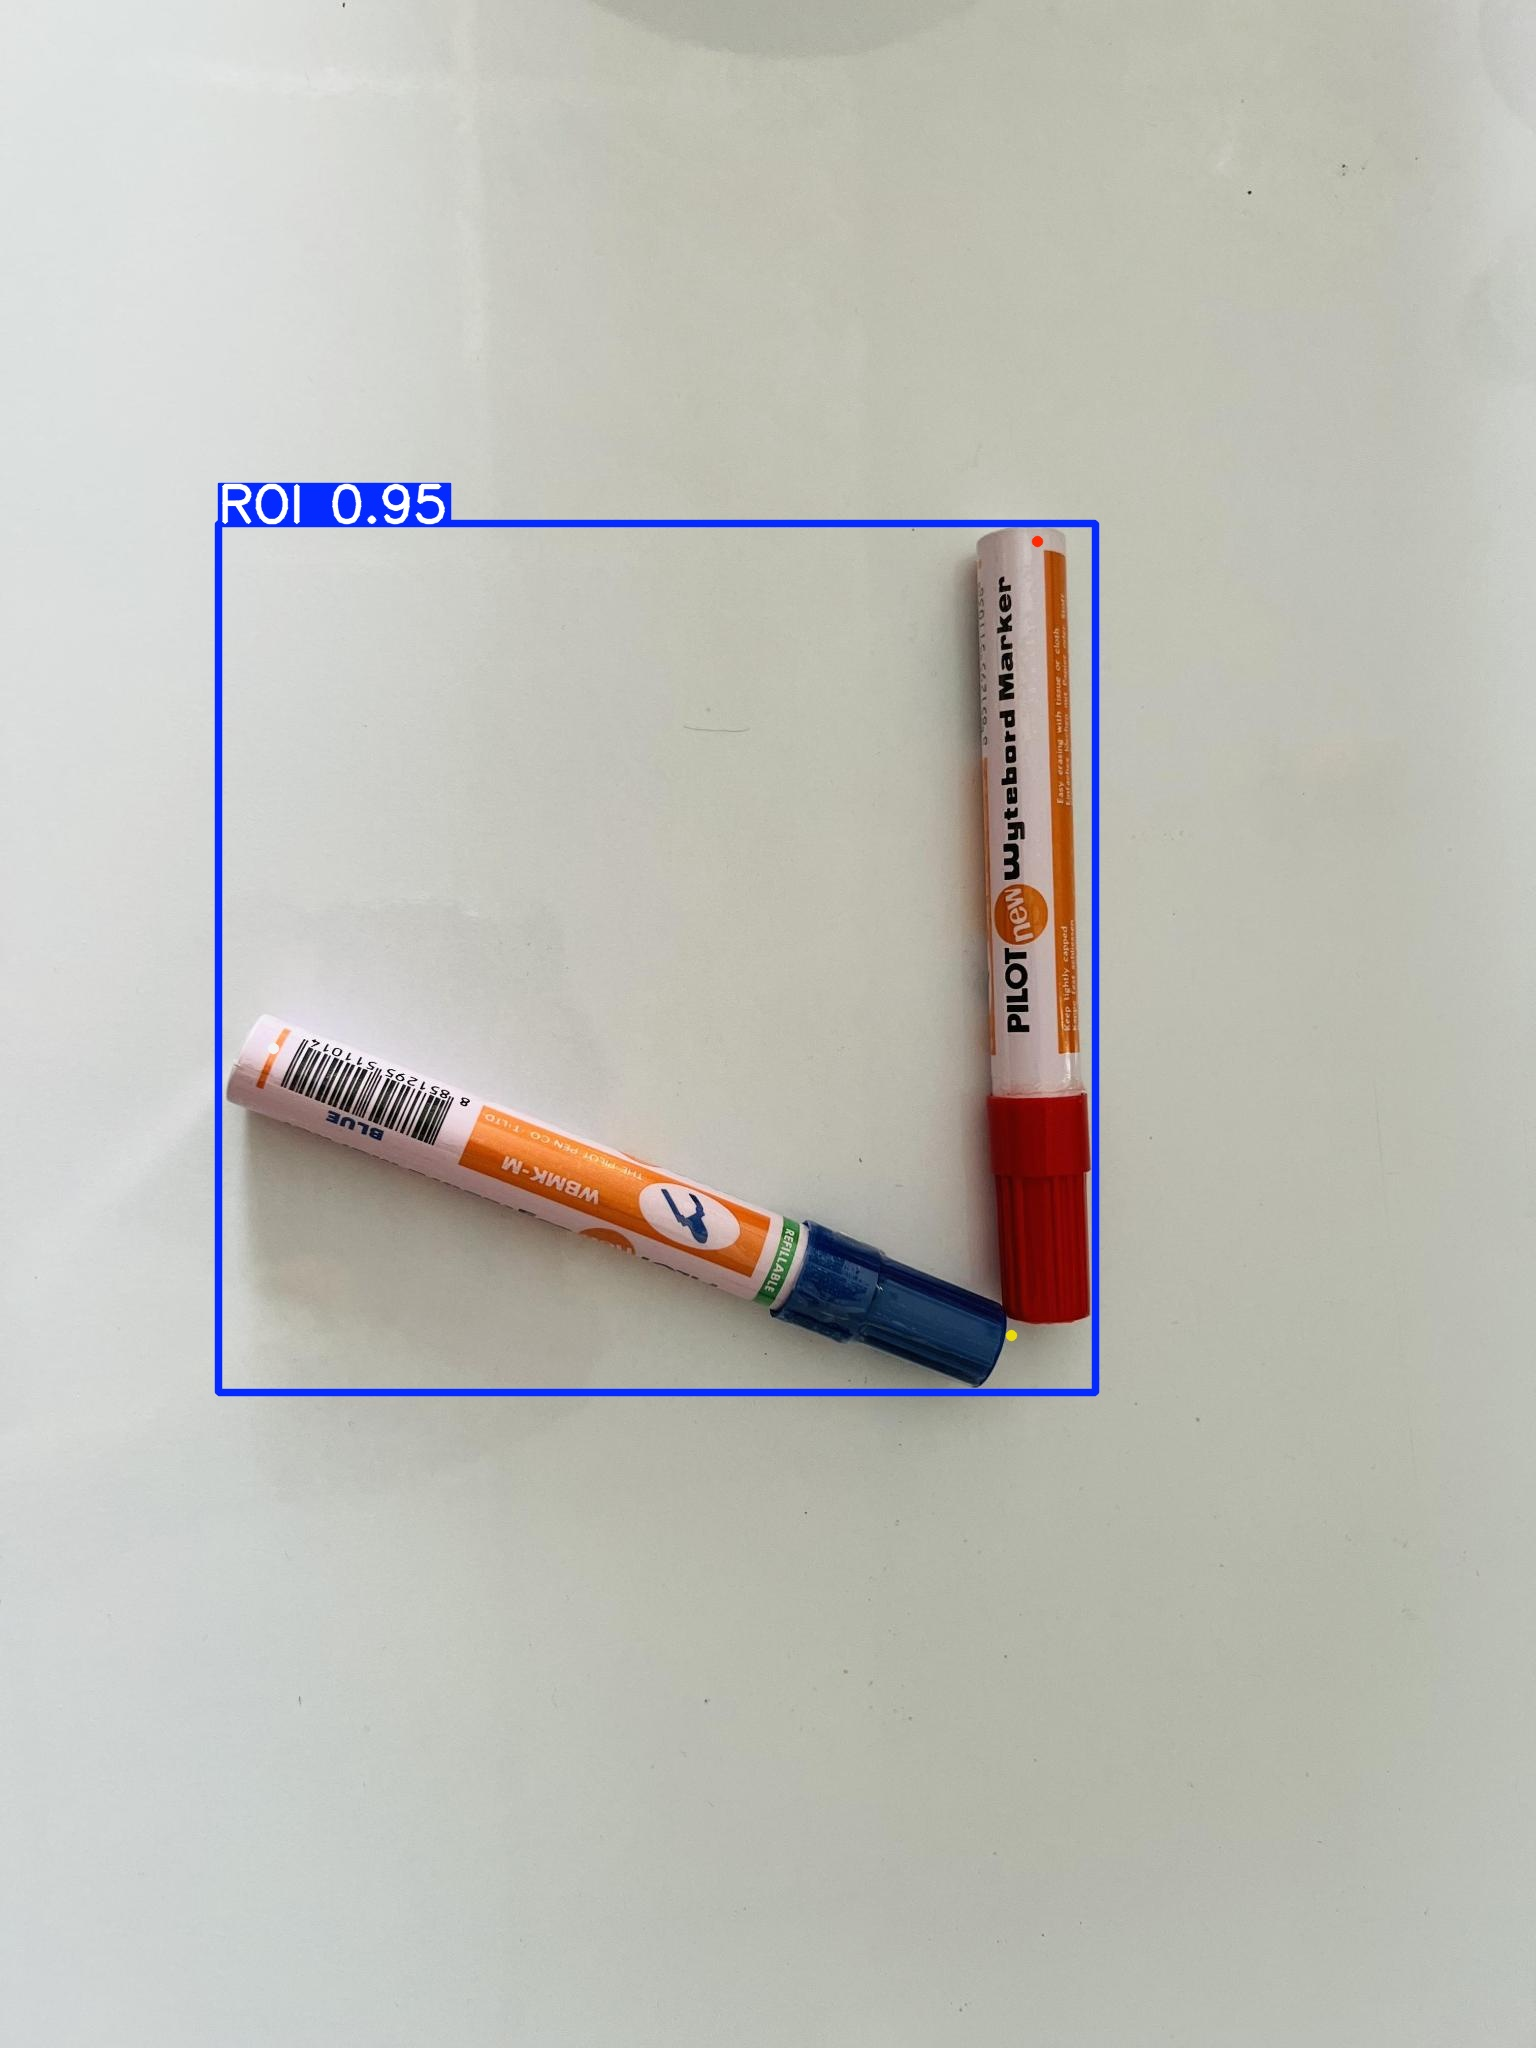

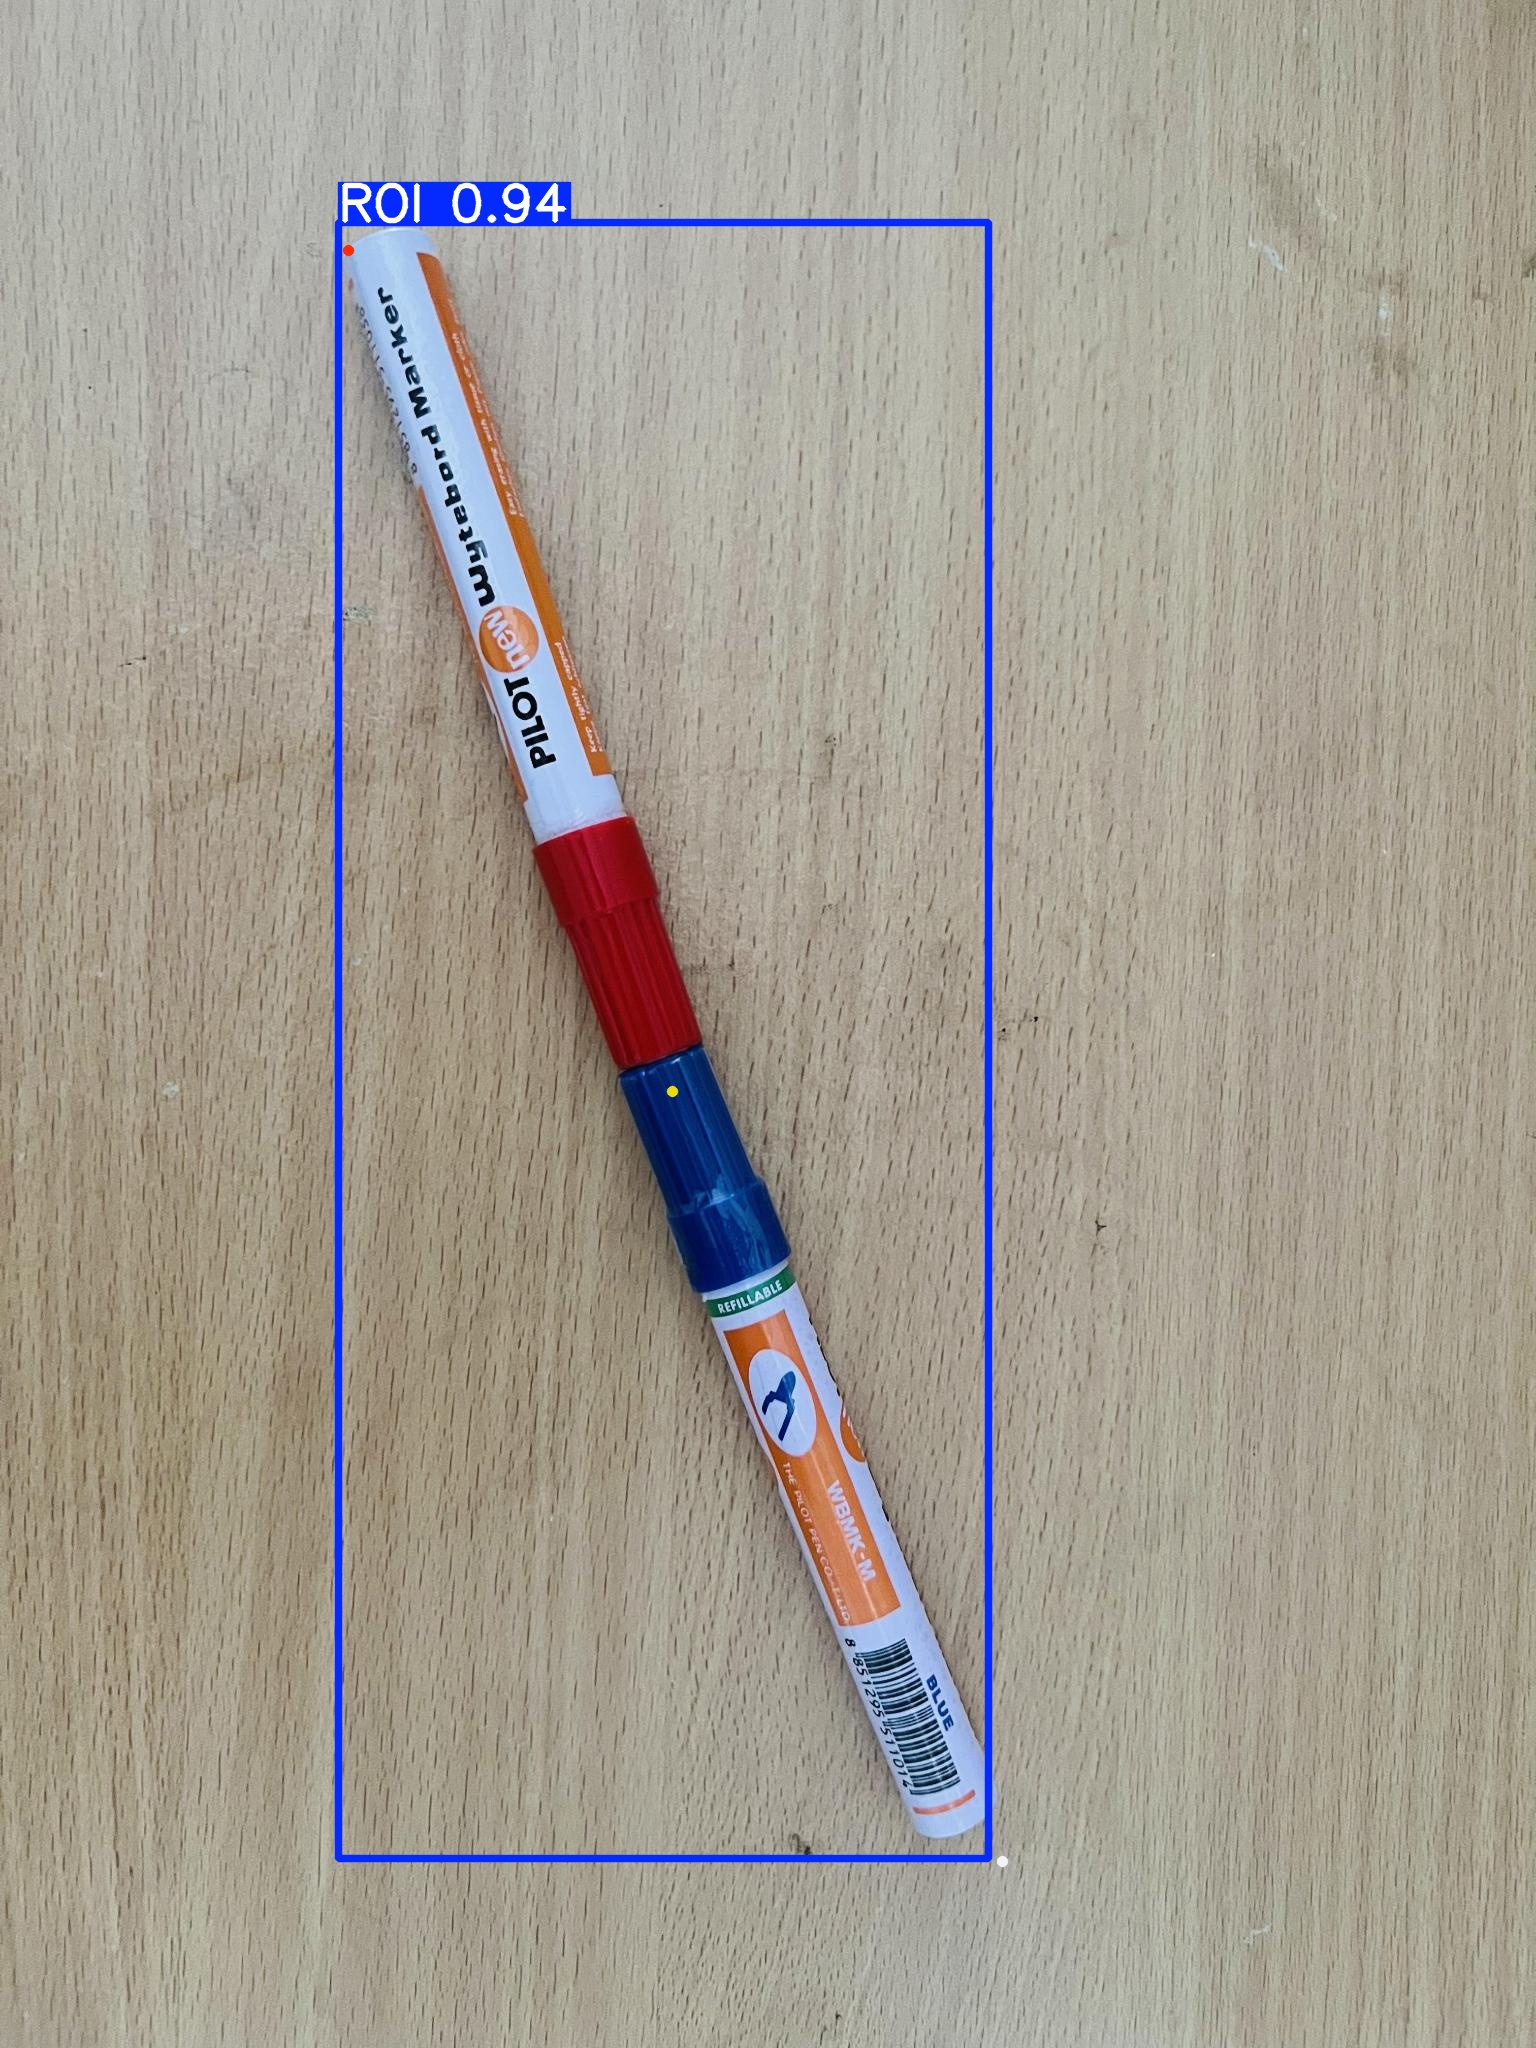

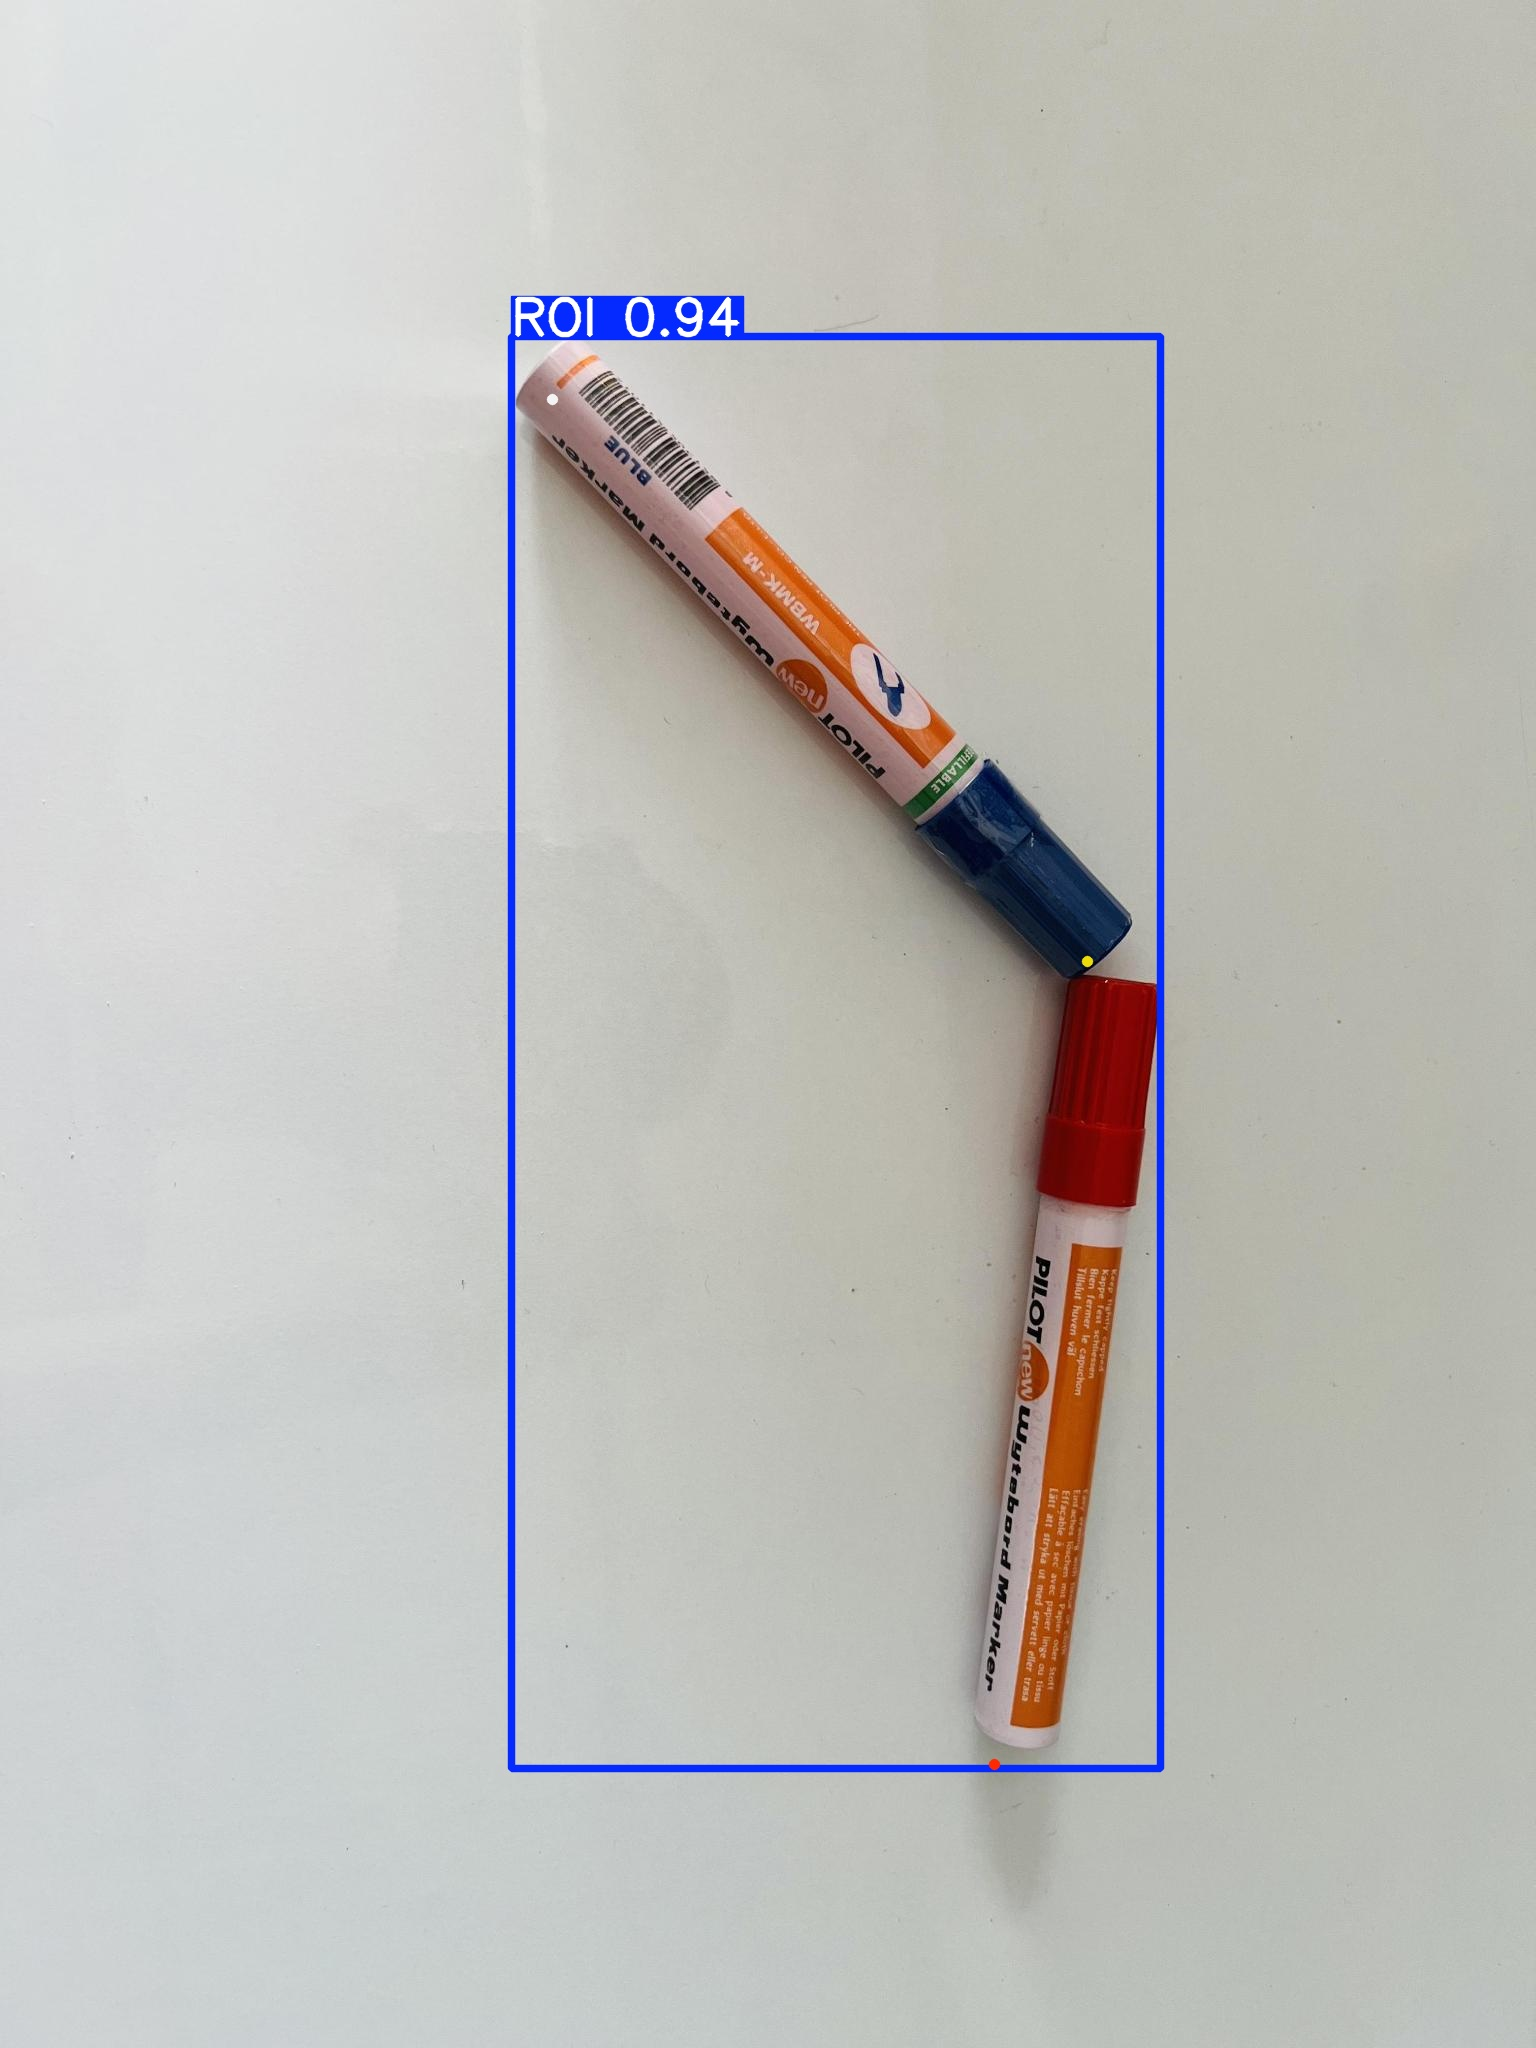

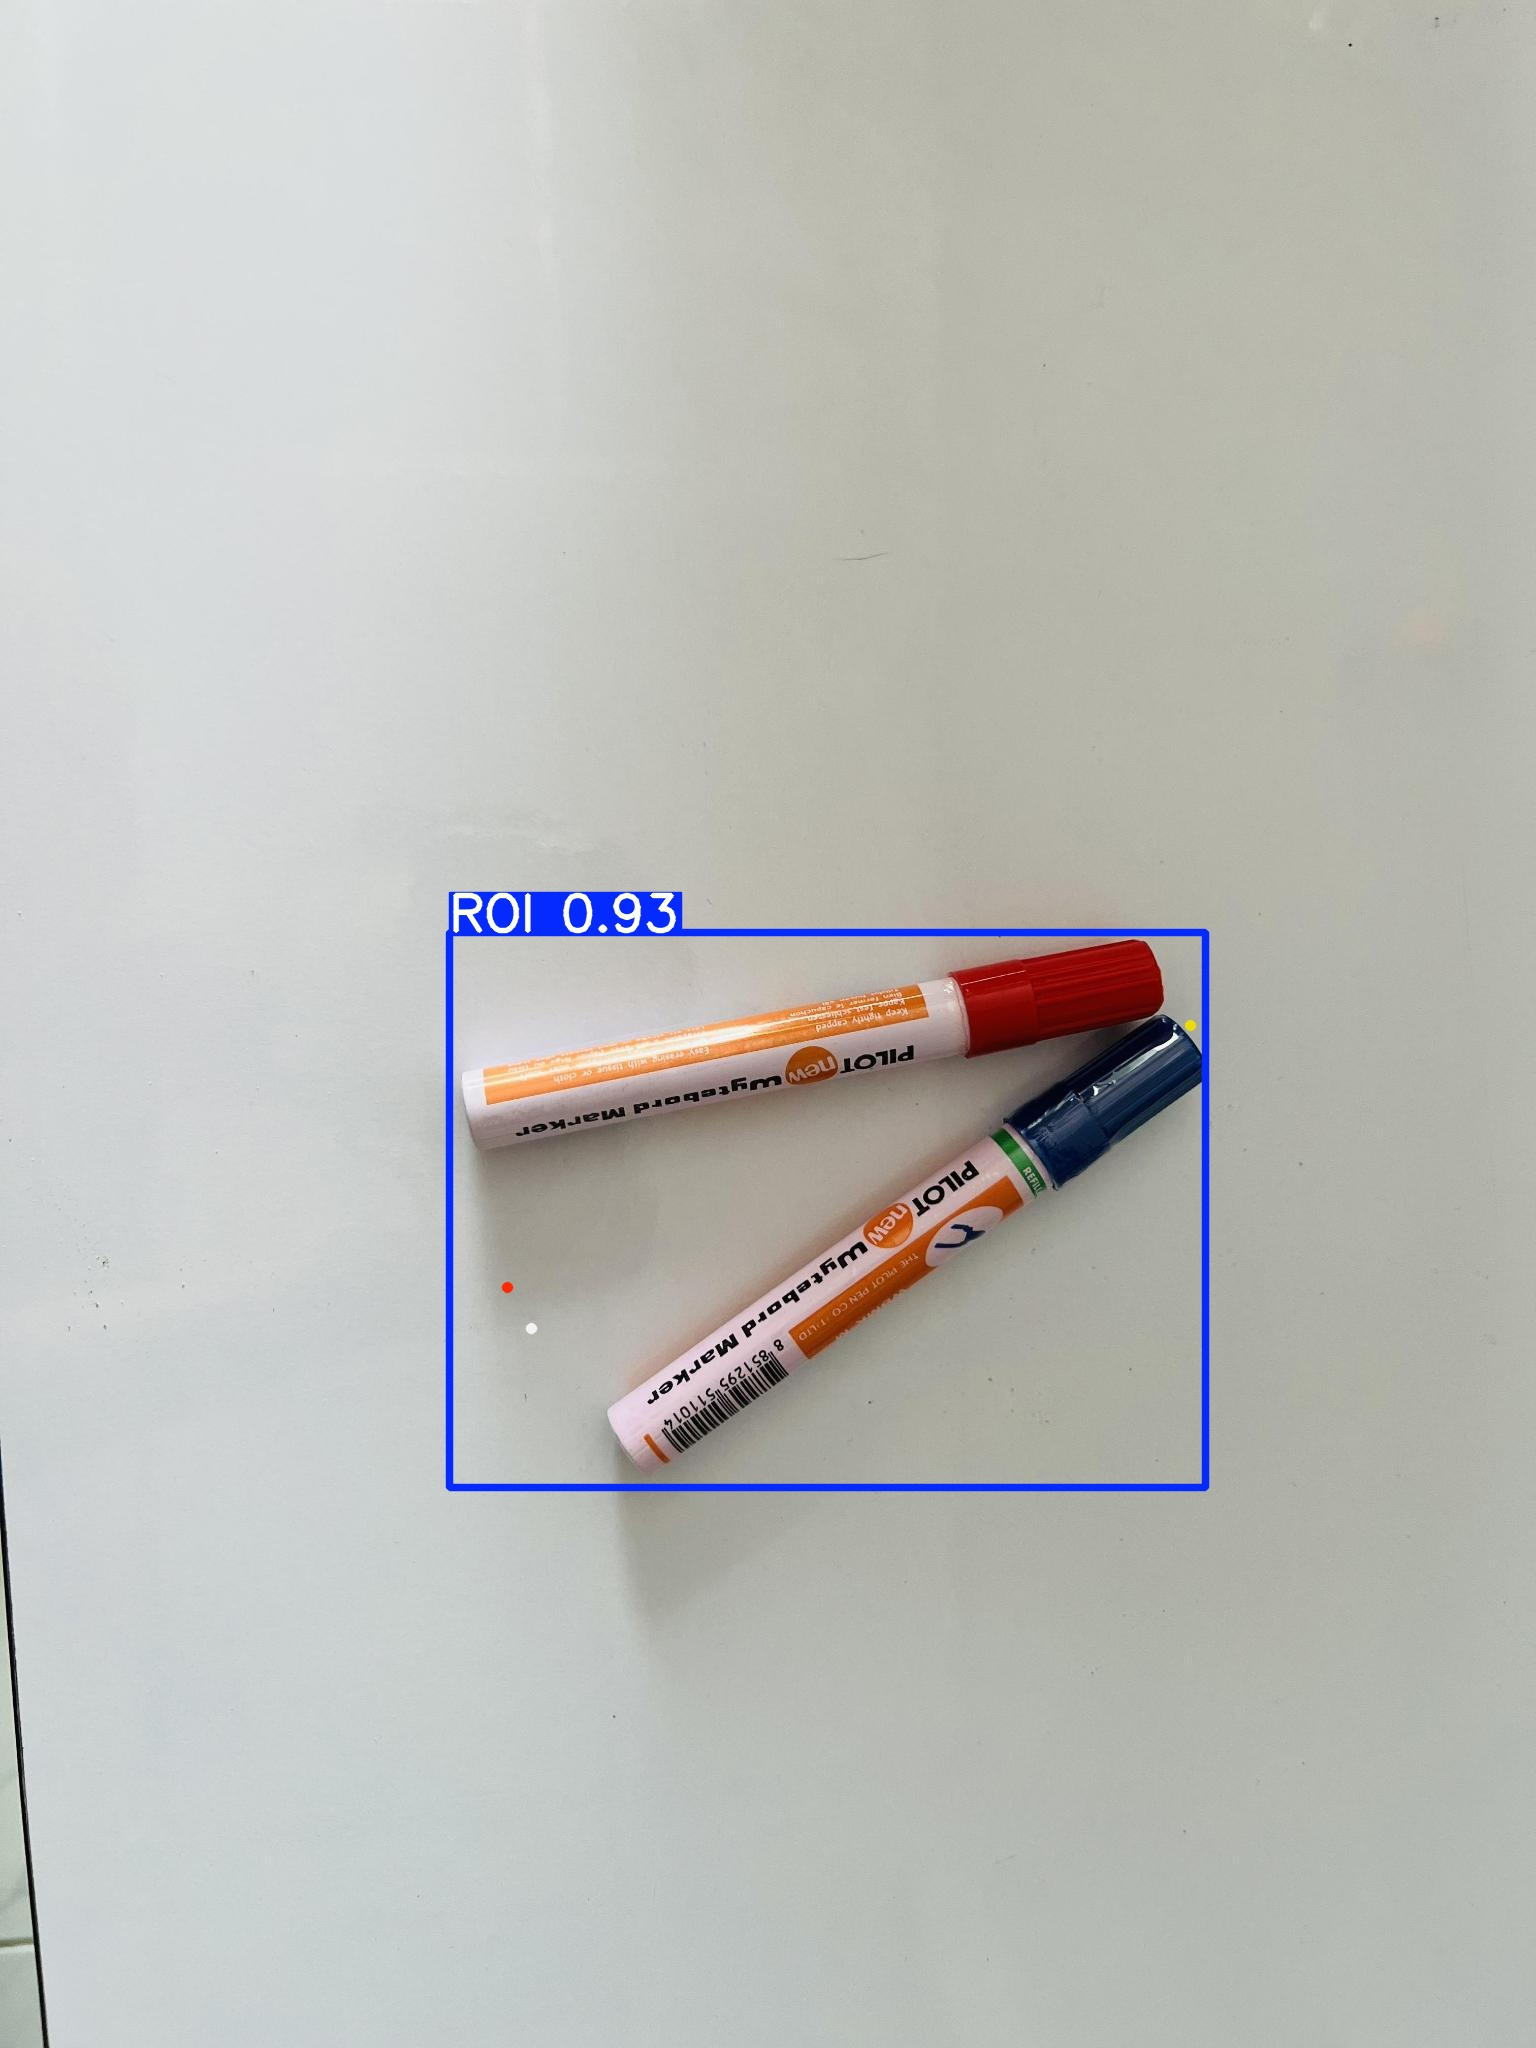

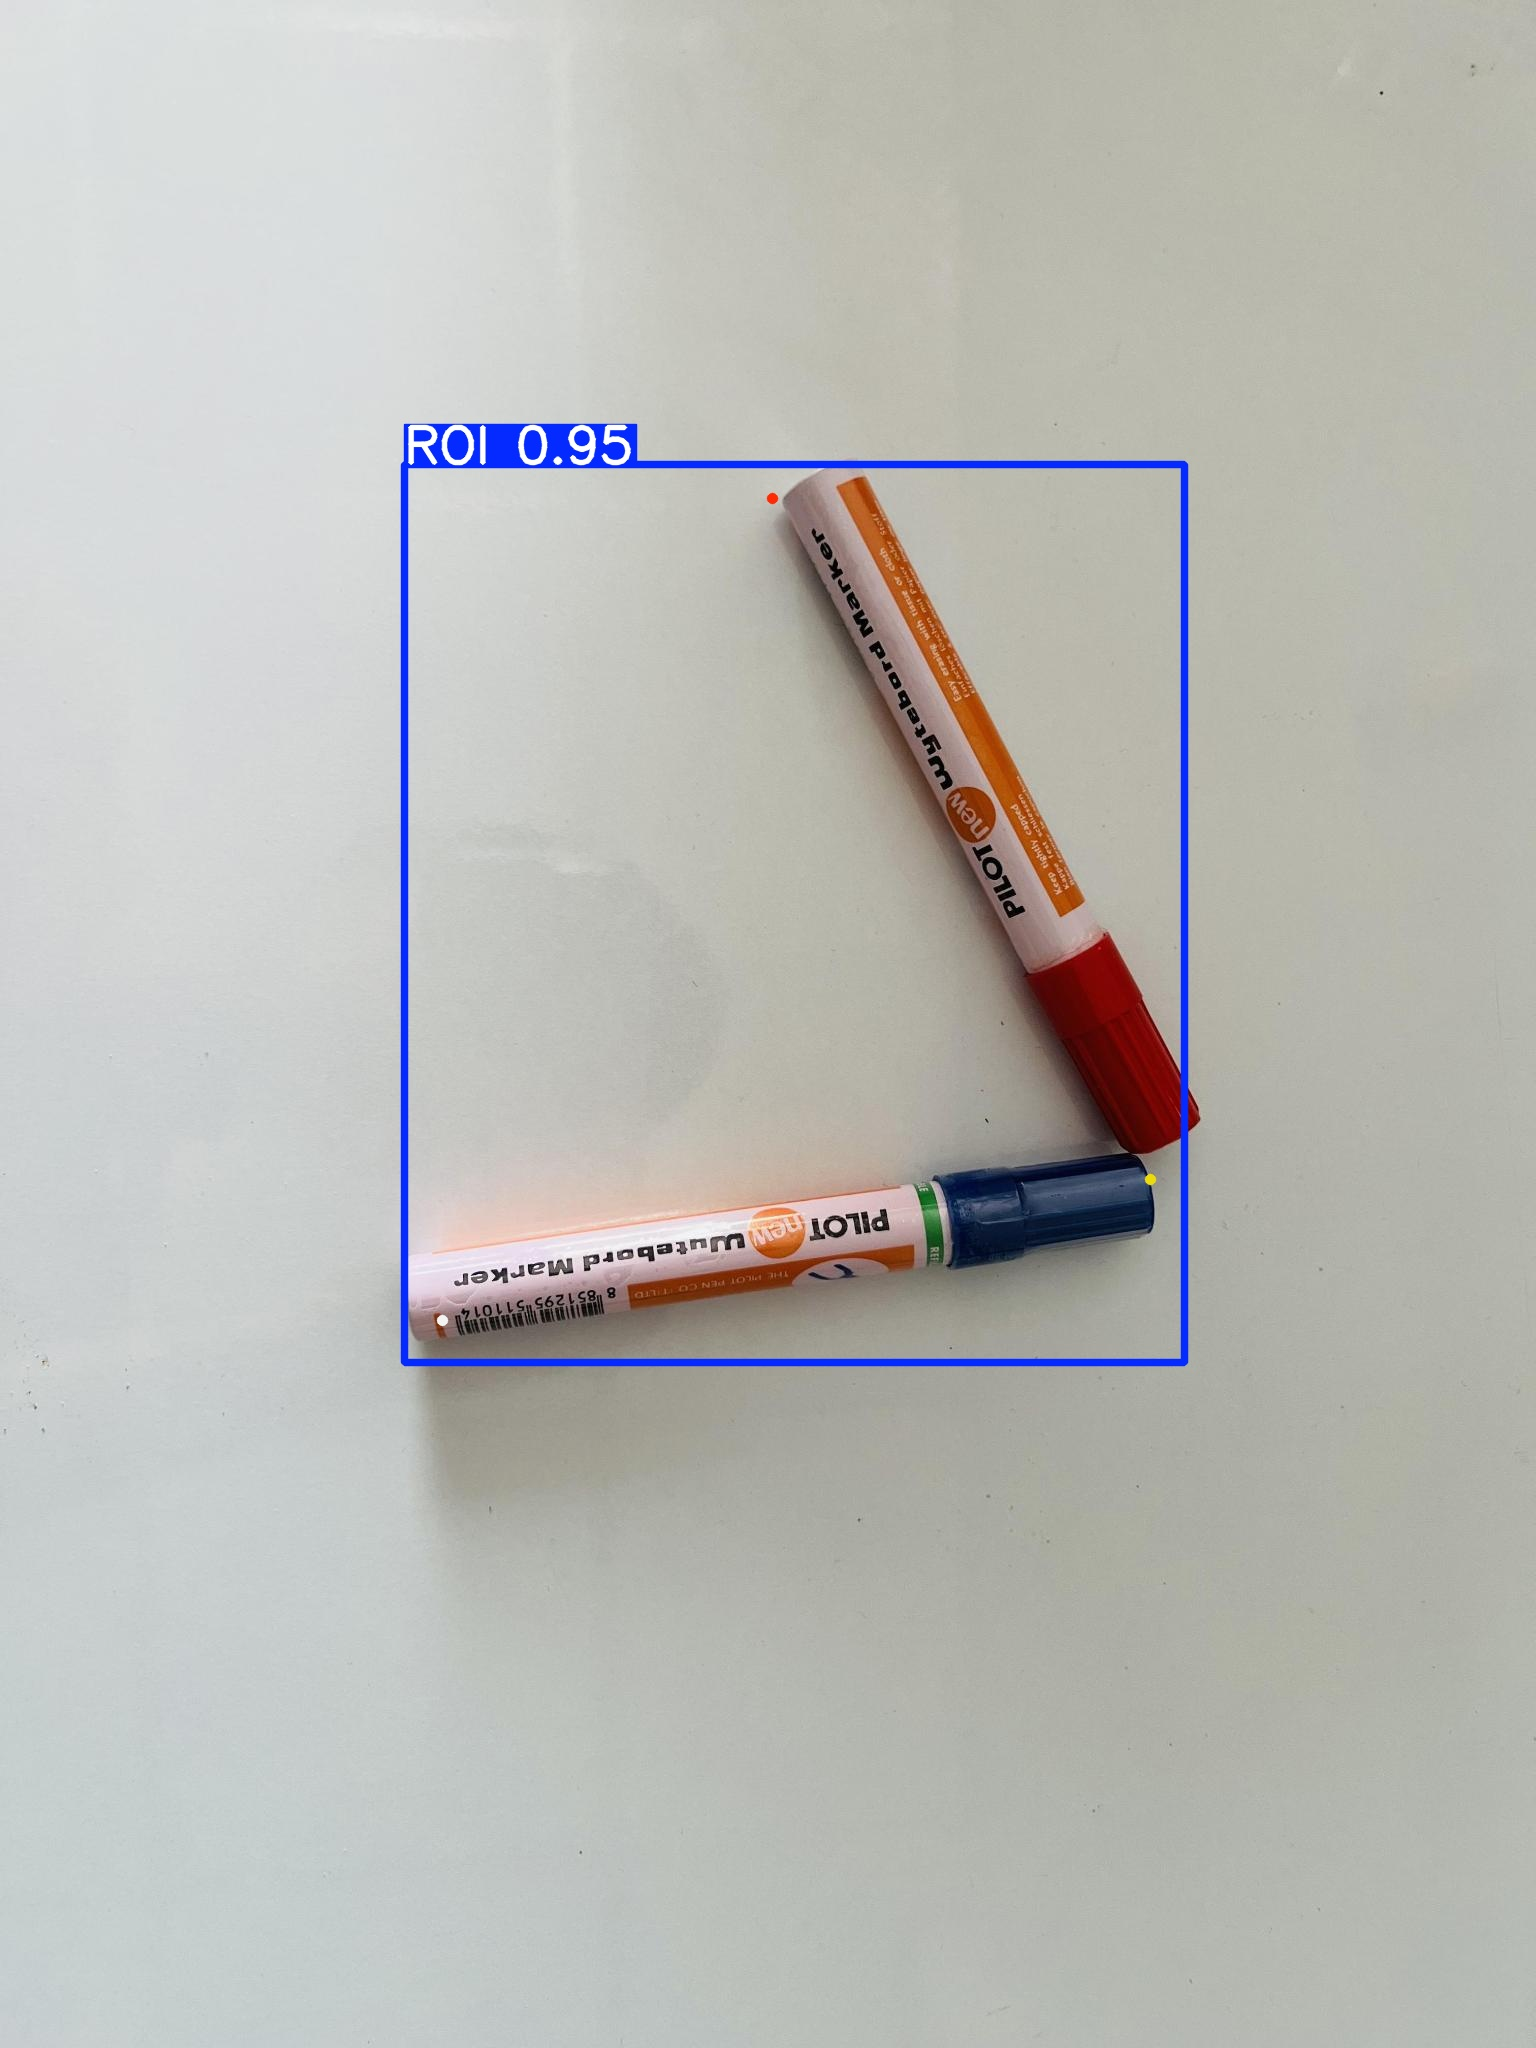

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/pose/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
# Load a model
model = YOLO("yolo11m-pose.yaml")  # build a new model from scratch
model = YOLO("yolo11m-pose.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="markerpen.yaml", epochs=300, imgsz=320, patience=0, pose=40.0, kobj=0.5, cache=True)  # train the model

New https://pypi.org/project/ultralytics/8.3.132 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=markerpen.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=0.5, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optim

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[2, 3]
Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True

train: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpen/train/labels... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [02:55<00:00,  1.45it/s]

train: New cache created: /content/gdrive/My Drive/yolov11/datasets/markerpen/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 255/255 [00:07<00:00, 34.08it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.6±0.3 MB/s, size: 461.5 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpen/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:26<00:00,  1.34s/it]

val: New cache created: /content/gdrive/My Drive/yolov11/datasets/markerpen/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 20/20 [00:00<00:00, 45.81it/s]


Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 112 weight(decay=0.0), 122 weight(decay=0.0005), 121 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/pose/train2
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/300       2.3G       2.33      12.49     0.3865      3.582      2.185         68        320: 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20         40      0.684       0.85      0.752      0.458      0.616      0.525      0.553      0.155



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.45G      1.209      8.051     0.3145     0.9624      1.215         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         40      0.764      0.888      0.907      0.499      0.262      0.275      0.154      0.031



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.62G      1.255       7.04     0.3093      0.991      1.217         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         20         40    0.00888      0.175    0.00468    0.00104    0.00986      0.275     0.0131    0.00366



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.71G      1.367      6.567     0.2934      1.081      1.287         63        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         20         40          0          0          0          0    0.00667        0.1    0.00386    0.00092



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.85G      1.426      6.518     0.2871      1.094      1.318         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         20         40          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.96G      1.315      5.768     0.2784      1.013      1.267         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         20         40    0.00133        0.1   0.000788   0.000169      0.002       0.15    0.00133   0.000281



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/300      3.09G      1.363      5.443       0.26      1.049       1.29         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all         20         40          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/300      3.21G      1.394      5.033     0.2551      1.059      1.287         67        320: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         40    0.00431        0.2    0.00235   0.000326    0.00762      0.375    0.00577    0.00134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/300      3.33G      1.517      6.005     0.2614      1.119      1.372         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         40    0.00236        0.1    0.00137   0.000367    0.00439      0.325    0.00305   0.000926



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/300      3.44G      1.484      6.204     0.2468      1.097      1.349         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         40          0          0          0          0    0.00408      0.075    0.00222   0.000222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/300      3.55G      1.347      5.407     0.2402      1.025      1.278         79        320: 100%|██████████| 16/16 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         20         40    0.00702      0.175    0.00413   0.000724    0.00106       0.05   0.000623   0.000147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/300      3.68G       1.29      4.853      0.247      0.998      1.243         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         20         40       0.02      0.575     0.0154    0.00509     0.0164      0.375      0.013    0.00463



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/300      3.79G      1.336      4.194     0.2391     0.9754       1.25         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         20         40       0.17       0.25      0.157     0.0544      0.227        0.4      0.237     0.0887



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/300      3.92G      1.321      4.462     0.2406     0.9654       1.24         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         20         40      0.295      0.275      0.115     0.0267      0.375       0.35      0.247     0.0684



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.03G      1.282      4.421     0.2375      0.947      1.242         55        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


                   all         20         40      0.226        0.8       0.22     0.0939      0.222      0.575      0.234      0.135

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.16G      1.372      4.498     0.2468     0.9824      1.284         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         20         40     0.0543       0.45      0.041     0.0124     0.0189      0.175    0.00889    0.00266



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.27G      1.386       6.72     0.2373      1.003      1.304         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         20         40      0.276       0.35      0.161     0.0691      0.375      0.475      0.276      0.175

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/300       4.4G      1.318      5.525      0.236      1.003      1.234         48        320: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         20         40      0.737      0.575      0.568      0.374      0.631      0.325       0.33      0.233



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/300      4.51G      1.176      3.835     0.2241     0.8769      1.162         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         20         40      0.481       0.25      0.225     0.0959      0.192      0.225      0.128     0.0869



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.64G      1.191      3.928     0.2283     0.8881      1.175         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         20         40      0.737       0.65        0.7      0.398      0.303       0.25      0.173      0.114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.75G      1.248      4.413     0.2221     0.9118      1.196         45        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         40      0.749       0.67      0.726      0.377      0.313       0.35      0.247      0.117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.88G      1.252      3.898     0.2281     0.9326      1.205         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         20         40      0.778      0.775      0.883      0.506      0.341        0.5      0.285      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.99G      1.207       3.82     0.2157     0.8801      1.171         64        320: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         40       0.88      0.917      0.964      0.636      0.284      0.396      0.198      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/300       5.1G      1.163      3.345     0.2381     0.8593      1.175         70        320: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         40      0.926      0.936       0.99      0.692      0.375      0.425      0.225       0.12



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/300      5.23G      1.121      4.115     0.2193     0.8162      1.146         72        320: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         20         40      0.995          1      0.995      0.762       0.61      0.625      0.465      0.366

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/300      5.34G      1.127      2.828     0.2196     0.8228      1.121         55        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         20         40      0.975      0.985      0.995      0.735      0.531       0.55      0.368       0.23



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/300      5.47G      1.084      2.957     0.2209     0.7945      1.092         68        320: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         20         40       0.94       0.95      0.981      0.701      0.433      0.325      0.321      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/300      5.58G      1.107       3.45     0.2118     0.7925      1.125         56        320: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         20         40      0.948      0.925      0.985      0.682      0.656      0.715      0.598      0.446



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/300      5.71G       1.11      3.503     0.2166     0.8134      1.132         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         20         40      0.738       0.85      0.862      0.487      0.389       0.45      0.235      0.093



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/300      5.82G      1.104       3.44     0.2107     0.7905       1.13         67        320: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         20         40      0.962      0.975      0.994      0.741      0.763      0.775      0.698      0.577



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/300      5.95G      1.105      3.381      0.198     0.8274      1.126         62        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         20         40      0.907       0.98       0.98      0.735      0.654      0.725      0.558      0.426



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/300      6.06G      1.061      3.217     0.2189      0.777      1.113         71        320: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         20         40      0.998      0.925      0.985      0.767      0.944      0.875      0.924      0.865



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/300      6.19G      1.028      3.526     0.2068     0.7534      1.088         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20         40      0.894        0.9      0.969      0.714      0.477      0.593      0.408      0.298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/300       6.3G      1.017      2.477     0.2038     0.7441      1.081         49        320: 100%|██████████| 16/16 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.711        0.7      0.675      0.357      0.546      0.525      0.422      0.195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/300      6.43G     0.9994       2.33     0.2136     0.7274      1.069         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         20         40      0.826      0.947      0.935      0.694      0.646      0.625      0.572       0.52



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/300      6.54G     0.9779      2.299     0.2048     0.7195      1.061         79        320: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         20         40       0.99          1      0.995      0.754      0.714       0.55      0.488      0.359



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/300      6.67G     0.9938      2.403     0.2126     0.7331      1.077         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         40          1      0.997      0.995      0.771      0.825      0.825      0.815      0.743



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/300      6.78G      1.026      2.521     0.2011     0.7563       1.08         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         20         40      0.869      0.993      0.964      0.752      0.672      0.768      0.682      0.569



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/300      6.91G      1.037      2.366     0.2057     0.7621      1.092         56        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20         40      0.942       0.85      0.912      0.668      0.488        0.5      0.365      0.249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/300      7.02G      1.028       2.72     0.1955     0.7467      1.097         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         20         40      0.936       0.95      0.979      0.777      0.688        0.7      0.617      0.589



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/300      7.15G      1.011      2.215     0.1949     0.7615      1.075         73        320: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         20         40      0.812          1       0.95      0.706      0.301        0.4      0.185      0.143



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/300      7.26G     0.9837       3.17     0.1977     0.7359      1.067         56        320: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         20         40      0.962          1      0.993      0.807      0.596        0.6      0.422      0.343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/300      7.39G     0.9335      1.902     0.1891     0.6973       1.05         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         40      0.975          1      0.995       0.77      0.342        0.3      0.167      0.083



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.73G     0.9926      2.424     0.1879     0.6964      1.051         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


                   all         20         40      0.997      0.975      0.992      0.763      0.616        0.6      0.461      0.387

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.73G     0.9867      2.342     0.1916     0.6978      1.052         57        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         40      0.908       0.99      0.983      0.768      0.725      0.791      0.642      0.564



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.73G      1.091      3.311     0.1981     0.7336      1.091         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         40      0.884      0.955       0.96      0.683      0.594      0.675      0.525      0.436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.79G      1.025      2.898     0.1918      0.731      1.098         45        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.975      0.992      0.993      0.786       0.78      0.798      0.692      0.633



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.83G     0.9623      2.167     0.1955     0.7051      1.058         54        320: 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         20         40      0.928      0.965      0.985      0.732      0.666      0.598      0.435      0.233



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.93G     0.9538      2.134     0.1916     0.7084      1.042         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         40      0.975      0.987      0.994      0.814      0.559      0.571      0.443      0.354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/300      3.06G     0.9176      1.829     0.1823     0.6914      1.054         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20         40      0.929      0.989      0.978      0.761      0.742      0.791      0.688       0.52



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/300      3.17G     0.9413      1.613     0.1954     0.6986      1.063         53        320: 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         40      0.969          1      0.995       0.79      0.602       0.55       0.39      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/300      3.28G     0.9196      1.604     0.1743     0.6688      1.039         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         40      0.994          1      0.995      0.819      0.472      0.475      0.268      0.226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.41G     0.9014      1.627      0.174     0.6783      1.033         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         40      0.996          1      0.995      0.805      0.622      0.625      0.442      0.381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/300      3.54G     0.9037      1.702     0.1664     0.6393      1.032         52        320: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


                   all         20         40      0.975      0.977      0.995       0.82      0.631      0.599      0.418      0.395

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/300      3.65G     0.9289      1.697      0.169     0.6719      1.042         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.971          1       0.99      0.796       0.51      0.525      0.376      0.265



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/300      3.76G     0.9211      2.387     0.1867     0.6699      1.033         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         40       0.99       0.95      0.987      0.746      0.759      0.725      0.636      0.608



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/300      3.89G     0.9625      2.103     0.1814     0.6983      1.054         58        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         20         40      0.982      0.975      0.994      0.799      0.704        0.7      0.557      0.413



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/300       4.1G     0.9008      1.745     0.1751      0.671      1.031         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         20         40      0.995          1      0.995      0.827      0.322      0.325      0.154     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.17G     0.8622      1.299     0.1555     0.6251      1.004         73        320: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.994          1      0.995      0.809      0.596        0.6      0.462      0.408



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/300      4.24G     0.9025      1.525     0.1634     0.6442      1.034         54        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         40      0.951      0.975       0.97      0.778      0.829       0.85      0.773      0.727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/300      4.37G     0.9581      1.193     0.1599     0.6647      1.047         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         40      0.928      0.967      0.987      0.767      0.704      0.773      0.682      0.547



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/300      4.48G     0.9825      1.313     0.1562     0.6919      1.053         68        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         20         40      0.975      0.973      0.994      0.768      0.617       0.65      0.518      0.378



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/300      4.61G     0.9788     0.9133     0.1483     0.7077      1.064         63        320: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.901      0.975      0.981       0.76      0.626      0.712      0.603       0.53



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/300      4.72G     0.9668      1.558     0.1545     0.6777      1.043         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         40      0.992          1      0.995      0.764      0.619      0.625       0.49      0.436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.83G      1.009      1.573     0.1458     0.7044      1.069         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         20         40      0.959          1      0.995       0.73      0.499      0.548      0.337      0.277



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/300      4.96G     0.9797      1.784     0.1593     0.6893      1.059         65        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         20         40      0.924       0.95      0.968       0.73      0.162        0.2     0.0622     0.0266



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/300      5.07G     0.9571      1.542     0.1497     0.6777      1.039         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         20         40      0.999          1      0.995      0.812      0.529      0.525       0.35      0.292

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/300       5.2G     0.8897       1.42     0.1453     0.6468      1.015         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20         40      0.991          1      0.995      0.817      0.545       0.55      0.382      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/300      5.31G     0.8543      1.388     0.1401     0.6399      1.015         59        320: 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         20         40      0.991          1      0.995      0.856      0.445       0.45      0.274      0.249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/300      5.44G     0.8239      1.686     0.1312     0.6113     0.9971         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         40      0.961          1      0.993      0.828      0.479        0.5      0.327      0.288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/300      5.54G     0.7948      1.645     0.1462     0.6051      0.994         38        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         40      0.906          1      0.989      0.816      0.729      0.672      0.603      0.541



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/300      5.68G     0.7704       1.65     0.1219     0.6012     0.9793         52        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         20         40      0.966          1      0.994      0.857      0.676        0.7      0.649      0.605



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/300      5.79G     0.8433      1.943     0.1323     0.6185     0.9851         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         20         40      0.986          1      0.995      0.851      0.738       0.75       0.63      0.543



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/300      5.92G     0.8371      1.286     0.1504     0.6347       1.01         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         20         40      0.956      0.975      0.994      0.811      0.619       0.65       0.45      0.374



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/300      6.03G      0.848      1.482     0.1416     0.6209      1.002         73        320: 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         20         40       0.96          1      0.994      0.838      0.719       0.75      0.656      0.627



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/300      6.16G     0.8375      1.389     0.1313     0.6177      1.008         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         40      0.975          1      0.995      0.833      0.658      0.675      0.501      0.454



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/300      6.27G     0.8341      1.422     0.1378     0.6204      1.006         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         20         40      0.774      0.675      0.799      0.468      0.137      0.225     0.0568     0.0163



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/300       6.4G      0.856      1.312     0.1355     0.6236      1.019         50        320: 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         40      0.995          1      0.995      0.866      0.596        0.6      0.418      0.395



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/300      6.51G     0.8071     0.9997     0.1262     0.6003      1.002         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.996          1      0.995      0.841      0.548       0.55      0.368      0.282



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/300      6.62G     0.8015      1.165     0.1276     0.5785     0.9827         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         20         40      0.997          1      0.995      0.812      0.624      0.625      0.494      0.477



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/300      6.75G     0.8018      1.623     0.1352     0.5848     0.9877         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         20         40      0.996          1      0.995      0.815      0.622      0.625      0.497      0.466



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/300      6.88G     0.8142      1.493     0.1229     0.6027     0.9924         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         20         40      0.989          1      0.995       0.82      0.641       0.65      0.498       0.42



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/300      6.99G      0.837      1.182     0.1268     0.6328          1         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         40      0.985          1      0.995      0.874       0.67      0.675      0.552      0.453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/300       7.1G     0.8158       1.11     0.1136     0.5903     0.9875         52        320: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         20         40      0.993          1      0.995       0.84      0.595        0.6      0.416       0.37



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/300      7.23G     0.8928      1.229     0.1244     0.6262      1.003         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]


                   all         20         40      0.971          1      0.995      0.833      0.705      0.725      0.574      0.526

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/300      7.34G     0.8468       1.02     0.1161     0.6259     0.9997         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         40      0.971          1      0.994      0.834      0.654      0.675       0.47      0.433



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/300      7.47G     0.8214      0.979     0.1059     0.6133     0.9912         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         40          1      0.974      0.994      0.825      0.721        0.7      0.581      0.513



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.64G     0.8347      1.505     0.1278     0.6162     0.9977         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         20         40      0.969          1      0.991      0.791      0.725       0.75       0.65      0.579



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.64G     0.8277     0.9049      0.103     0.6027     0.9894         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         20         40      0.963          1      0.993      0.797      0.773        0.8      0.709      0.655



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.66G     0.7715      1.088     0.1021     0.6014     0.9877         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         40      0.983          1      0.995      0.845      0.819      0.793      0.702      0.669



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/300       2.7G     0.7911     0.8406    0.09513     0.5781     0.9804         67        320: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         40       0.95          1      0.995      0.831       0.57        0.6      0.422      0.386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.81G     0.8116     0.9509     0.1268     0.5763     0.9917         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         20         40      0.927          1      0.989      0.797       0.52       0.55       0.39      0.288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.92G     0.8137     0.9353     0.1115       0.57     0.9998         79        320: 100%|██████████| 16/16 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         20         40      0.888      0.775      0.863      0.592      0.302        0.4      0.189     0.0787



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/300      3.06G     0.7847      1.297     0.1097     0.5828     0.9859         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         40      0.903      0.975      0.988       0.84      0.687      0.625      0.571      0.515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/300      3.16G     0.7778      1.242      0.116     0.5725     0.9751         70        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20         40      0.931        0.9      0.946      0.778      0.641      0.625      0.529      0.417



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/300      3.29G     0.7634     0.6953     0.1116      0.569     0.9879         65        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all         20         40      0.951      0.965      0.989      0.835      0.736        0.7      0.615      0.545

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/300      3.41G     0.7819       1.06     0.1278     0.5703     0.9893         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         20         40      0.984          1      0.995      0.839       0.86      0.875      0.816      0.735



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/300      3.53G     0.7769     0.7714    0.09204     0.5595     0.9765         48        320: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         20         40      0.996          1      0.995      0.848      0.819      0.825      0.766      0.717



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/300      3.64G     0.7817     0.8209     0.1035     0.5653     0.9771         68        320: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20         40      0.962          1       0.99      0.808      0.696      0.725       0.62      0.585



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/300      3.77G     0.7871     0.8159     0.1083     0.5796     0.9794         67        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         20         40      0.946      0.975      0.986      0.762      0.666      0.647      0.578      0.462



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/300      3.88G     0.7575       1.17     0.1047     0.5633     0.9746         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         20         40      0.981          1      0.995      0.888      0.642       0.65      0.517      0.477



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/300      4.01G      0.776      0.891    0.09609     0.5552     0.9848         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         40      0.992          1      0.995       0.87      0.694        0.7      0.568      0.435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/300      4.12G     0.7683      1.096     0.1204     0.5482     0.9728         75        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         20         40      0.996          1      0.995      0.893      0.698        0.7      0.543      0.432

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/300      4.23G     0.7413      1.265     0.1144     0.5536      0.968         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20         40      0.993          1      0.995      0.859      0.816        0.8      0.708      0.607



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/300      4.36G      0.759      1.002     0.1049     0.5457     0.9686         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         20         40      0.998          1      0.995      0.842      0.825        0.8      0.768      0.718



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/300      4.47G     0.7778     0.9968     0.1231     0.5682     0.9872         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         40      0.996          1      0.995      0.817        0.7        0.7      0.582      0.478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/300       4.6G      0.805     0.9498     0.1062     0.5822     0.9879         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         20         40      0.951          1      0.991      0.782      0.426       0.45      0.257      0.111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/300      4.71G     0.7733     0.7356     0.1026     0.5724     0.9957         71        320: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         20         40      0.928      0.975      0.991      0.843       0.76      0.775      0.682      0.606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/300      4.84G     0.7454      0.722    0.08758     0.5441     0.9583         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all         20         40      0.909      0.975      0.981      0.824      0.624      0.748      0.578      0.499

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.95G     0.7245     0.5183    0.08868      0.538     0.9654         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         20         40      0.974       0.94      0.991      0.837      0.667       0.75      0.553      0.499



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/300      5.08G     0.7069     0.7818    0.08465     0.5212     0.9494         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20         40      0.988          1      0.995      0.843      0.716      0.725      0.544      0.497



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/300      5.19G      0.765     0.8039    0.09922     0.5561     0.9856         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.974          1      0.994       0.87      0.688       0.65      0.507      0.485



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/300      5.32G     0.7397     0.6413    0.08268     0.5456     0.9576         80        320: 100%|██████████| 16/16 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         20         40          1      0.994      0.995      0.889       0.71      0.675      0.512      0.483



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/300      5.43G     0.7539      1.139    0.09313     0.5563     0.9715         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         20         40      0.994          1      0.995      0.841      0.719      0.704      0.609      0.579



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/300      5.56G     0.7678     0.9003    0.09915     0.5532     0.9689         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         20         40      0.972          1      0.995      0.842      0.607      0.625       0.46      0.429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/300      5.67G      0.726     0.7686    0.09817     0.5275     0.9681         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         20         40      0.927      0.975       0.98      0.804      0.557      0.625      0.459       0.38



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/300       5.8G      0.708     0.8203    0.09214     0.5254     0.9653         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         40      0.997          1      0.995       0.87      0.598        0.6      0.431      0.393



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/300      5.91G      0.733      0.462    0.08049     0.5189     0.9673         73        320: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         20         40      0.992          1      0.995      0.898      0.571      0.575      0.475       0.39



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/300      6.04G     0.7347      0.682    0.08709     0.5414      0.954         63        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20         40      0.982          1      0.995      0.866      0.589        0.6      0.431      0.398



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/300      6.15G     0.7403     0.7727     0.1028      0.543     0.9719         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         20         40          1      0.995      0.995      0.876      0.724      0.722      0.565      0.476



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/300      6.28G     0.7073     0.8529    0.09192     0.5353     0.9661         74        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         40      0.996          1      0.995      0.876      0.693        0.7      0.535       0.48



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/300      6.39G     0.7195     0.8292    0.08376     0.5359     0.9723         47        320: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         20         40      0.996          1      0.995      0.862      0.772      0.775       0.64      0.595



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/300       6.5G      0.704     0.9136     0.1001     0.5155     0.9602         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         40      0.929          1       0.99      0.861      0.696       0.75      0.596      0.562



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/300      6.63G     0.7195     0.7579    0.09023      0.514      0.943         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         40       0.97          1      0.991       0.87      0.726       0.75      0.594      0.512



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/300      6.74G     0.7373     0.6062     0.1059     0.5302     0.9788         43        320: 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         20         40      0.978          1      0.995      0.877      0.683        0.7       0.53      0.488



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/300      6.87G     0.7438     0.6578    0.08615     0.5423      0.969         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all         20         40      0.969          1      0.995      0.888      0.654      0.675      0.549      0.512

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/300      6.98G     0.7961     0.9303     0.1007     0.5604     0.9821         63        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         40      0.929          1       0.98      0.808      0.691       0.75      0.614      0.548



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/300      7.21G      0.837     0.9965     0.1151     0.5904     0.9836         58        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         20         40      0.925          1      0.977      0.804      0.673      0.725      0.573      0.559



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/300      7.28G      0.767     0.8598    0.09957     0.5714     0.9768         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all         20         40      0.944          1      0.977      0.833      0.757        0.8       0.64      0.631

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/300      7.35G     0.6986     0.4025    0.09466     0.5308     0.9674         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         20         40      0.928          1      0.981      0.835      0.788      0.837      0.736      0.726



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/300      7.46G     0.6997     0.5914    0.09198      0.515     0.9684         52        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         20         40      0.994          1      0.995       0.87       0.82      0.825      0.753      0.705



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.66G     0.7054      0.609    0.08607       0.51     0.9475         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         20         40      0.998          1      0.995      0.863      0.725      0.725      0.638      0.565



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.66G     0.7048     0.5893    0.07052     0.5094      0.959         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         40      0.973          1      0.991      0.871      0.681        0.7      0.519      0.435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.66G     0.6812     0.4259    0.07683     0.5076     0.9492         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20         40      0.949          1      0.984      0.855      0.617       0.65      0.445      0.374



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/300       2.7G     0.6855     0.7159    0.07861     0.5058     0.9469         49        320: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         40      0.972          1      0.993      0.874      0.656      0.675      0.484      0.416



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/300       2.8G     0.6673     0.4355    0.06898     0.5025     0.9296         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         20         40      0.995          1      0.995       0.88      0.696        0.7      0.515      0.503



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.93G     0.6439     0.4038    0.07388     0.4871     0.9318         71        320: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         20         40      0.951      0.977      0.981      0.828      0.439       0.45      0.256      0.159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/300      3.04G     0.6722     0.5897    0.07463     0.5013     0.9471         82        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         40      0.971          1      0.995      0.886      0.803      0.825      0.739       0.67



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/300      3.17G     0.6686     0.5881    0.07461     0.5052     0.9448         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         20         40      0.971          1      0.991      0.807      0.704      0.725       0.56      0.534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/300      3.38G     0.7008     0.7251     0.0986     0.5134     0.9544         65        320: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         40      0.997          1      0.995      0.852      0.674      0.675      0.546      0.509



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/300      3.45G     0.6549     0.3794     0.0704     0.4902     0.9379         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         40       0.99          1      0.995      0.859      0.644       0.65      0.511      0.485



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/300      3.52G      0.666     0.6279    0.06789     0.4966     0.9444         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.974          1      0.995      0.875      0.706      0.725      0.588      0.557



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/300      3.63G     0.7021     0.5629    0.07723     0.5185     0.9559         66        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         20         40      0.852      0.925      0.902      0.764      0.684      0.775      0.661      0.607



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/300      3.76G     0.7228     0.6996     0.0789     0.5387     0.9649         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         20         40      0.975      0.982      0.995      0.826      0.724      0.725      0.639      0.591

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/300      3.89G     0.6571      0.488     0.0654     0.4991     0.9464         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         40      0.994          1      0.995      0.888      0.748       0.75      0.645      0.599



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/300         4G     0.7064     0.6177    0.07958     0.5142      0.968         63        320: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         20         40       0.95          1      0.992      0.872      0.641      0.675      0.499       0.43



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/300      4.11G     0.6436     0.8311    0.07113      0.477     0.9289         72        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         40      0.973          1      0.988      0.862      0.595      0.623      0.417      0.372



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/300      4.24G     0.6704      0.582    0.07255     0.4968     0.9555         55        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         20         40      0.972          1      0.993      0.843      0.584        0.6      0.421      0.377



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/300      4.35G      0.659     0.3854    0.05978     0.4902     0.9352         55        320: 100%|██████████| 16/16 [00:04<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         20         40      0.971          1       0.99      0.842      0.535       0.55      0.384      0.288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/300      4.48G     0.6812     0.5191    0.07607     0.5055     0.9465         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         20         40      0.968          1      0.987      0.867      0.545      0.575      0.391      0.284

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/300      4.59G     0.6966     0.6257    0.08024     0.5001     0.9608         49        320: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         20         40      0.966          1      0.986      0.871      0.748      0.775      0.627      0.517



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/300      4.72G     0.6994     0.4749    0.07331     0.5129     0.9623         76        320: 100%|██████████| 16/16 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         20         40      0.973          1      0.988       0.89      0.633       0.65      0.482      0.415



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/300      4.83G     0.6676     0.4247    0.07238     0.4916     0.9532         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         20         40      0.995          1      0.995      0.861      0.647       0.65        0.5      0.384



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/300      4.96G     0.6999     0.5029    0.07615     0.5075     0.9509         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         20         40      0.998          1      0.995      0.873      0.674      0.675      0.509      0.457



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/300      5.07G     0.6737     0.3329    0.06721     0.4912      0.961         70        320: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         20         40      0.967          1      0.988      0.874        0.7      0.725       0.56      0.505



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/300       5.2G     0.6418     0.2637    0.05486     0.4817     0.9326         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         20         40      0.973          1      0.984      0.896      0.705      0.725      0.571      0.514



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/300      5.31G     0.6522     0.5859    0.06909     0.4789     0.9378         74        320: 100%|██████████| 16/16 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         20         40      0.972          1      0.984      0.897      0.779        0.8      0.721      0.694

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/300      5.44G     0.6763     0.6379    0.06865      0.495     0.9341         68        320: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         20         40      0.952      0.998       0.98      0.862      0.781      0.825       0.74      0.682



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/300      5.55G     0.6561     0.6677     0.0852     0.4996     0.9492         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         20         40      0.973          1      0.994      0.899       0.77      0.775      0.658      0.609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/300      5.68G     0.6492     0.4407    0.07157     0.4914     0.9436         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20         40      0.992          1      0.995      0.908      0.767      0.775      0.663      0.596



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/300      5.79G     0.6295     0.4417    0.06374     0.4809     0.9237         85        320: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         40      0.983          1      0.995      0.888      0.688        0.7      0.536      0.509



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/300      5.92G     0.6312      0.341    0.05878      0.474       0.93         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         40      0.996          1      0.995      0.888      0.747       0.75      0.598      0.549



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/300      6.03G     0.6602     0.7228    0.07113     0.4823     0.9433         55        320: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         20         40      0.996          1      0.995      0.885      0.722      0.725      0.544      0.507



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/300      6.16G     0.6819      1.166    0.08872     0.4838     0.9568         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         20         40      0.997          1      0.995      0.897      0.773      0.775      0.634      0.606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/300      6.27G     0.6475     0.8369    0.07992     0.4687     0.9397         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         20         40      0.993          1      0.995      0.882      0.768      0.775      0.626      0.596



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/300       6.4G     0.6517     0.6571     0.0676     0.4774     0.9369         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20         40      0.988          1      0.995      0.903       0.69      0.723      0.551      0.522



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/300      6.51G     0.6287     0.6572    0.08664     0.4662     0.9376         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         40      0.998          1      0.995      0.886      0.674      0.675      0.498      0.429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/300      6.62G     0.6179     0.5175    0.06742     0.4627     0.9215         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         20         40      0.996          1      0.995      0.883      0.747       0.75      0.622      0.527



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/300      6.75G     0.6435     0.4631    0.06982     0.4625     0.9308         59        320: 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         20         40      0.997          1      0.995      0.896      0.747       0.75      0.649       0.59



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/300      6.88G     0.5865     0.2657    0.05695     0.4515     0.9224         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         20         40      0.998          1      0.995        0.9      0.773      0.775      0.698       0.62



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/300      6.99G     0.5783     0.4436    0.06413     0.4403      0.912         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         20         40      0.997          1      0.995      0.908      0.823      0.825      0.772      0.699

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/300       7.1G     0.6043     0.4923    0.06054     0.4566     0.9277         55        320: 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20         40      0.951          1      0.995      0.898      0.761        0.8      0.707      0.661



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/300      7.22G      0.627      0.401    0.06993     0.4644     0.9368         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         20         40      0.998          1      0.995      0.882      0.798        0.8      0.692      0.664



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/300      7.34G     0.6693     0.4429    0.06562     0.4774     0.9594         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         40      0.965          1      0.993      0.851      0.771        0.8      0.673      0.645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/300      7.47G     0.6354     0.4266    0.07341     0.4744      0.931         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         20         40      0.997          1      0.995      0.897       0.69      0.675      0.554      0.492

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.65G     0.6457     0.4051    0.05999     0.4818     0.9366         63        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         20         40      0.994          1      0.995      0.916      0.724      0.725      0.598      0.519

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.65G     0.6119     0.3492    0.06505     0.4637     0.9243         75        320: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         20         40      0.985          1      0.995      0.921      0.707        0.7      0.564      0.547



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.67G     0.5959     0.2785    0.05523      0.442     0.9157         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         20         40      0.995          1      0.995      0.907      0.773      0.775      0.677      0.635



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.71G      0.578     0.3057    0.05916     0.4351     0.9089         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         20         40      0.972          1      0.984      0.898      0.778        0.8      0.705      0.687



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.81G     0.5707     0.3412     0.0567     0.4326     0.9121         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.998          1      0.995      0.888      0.748       0.75      0.664      0.606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.92G     0.5778     0.2757    0.06921     0.4305     0.9189         78        320: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         20         40      0.997          1      0.995      0.902      0.673      0.675      0.555      0.534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/300      3.05G     0.5796     0.2963    0.05305     0.4356     0.9181         71        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         20         40      0.997          1      0.995      0.893      0.698        0.7      0.573       0.54



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/300      3.16G     0.5446     0.4193    0.06426     0.4106     0.9096         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         20         40      0.971          1      0.984      0.884      0.704      0.725      0.591      0.546

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/300      3.29G     0.5949     0.4133     0.0555     0.4425      0.932         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         20         40      0.969          1      0.985      0.873      0.678        0.7      0.561       0.54



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/300       3.4G     0.5564     0.3532    0.06601       0.43     0.9093         68        320: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20         40      0.974          1      0.984      0.888      0.852      0.875      0.836      0.798



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/300      3.53G     0.5539     0.4064    0.06536     0.4288     0.9119         55        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         20         40      0.974          1      0.984      0.878      0.852      0.875       0.83      0.784



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/300      3.64G      0.563     0.3904    0.04761     0.4385     0.9217         67        320: 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         20         40      0.998          1      0.995      0.897      0.725      0.725      0.604      0.595



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/300      3.77G     0.5504     0.1955       0.05     0.4099     0.9124         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         20         40      0.998          1      0.995      0.901      0.748       0.75       0.62      0.607



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.88G     0.5809     0.2163    0.04237     0.4272     0.9191         69        320: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         20         40      0.998          1      0.995      0.917      0.748       0.75      0.635      0.611



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.01G     0.5675      0.344    0.05427     0.4297     0.9072         61        320: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         20         40      0.996          1      0.995      0.898      0.697        0.7      0.562      0.546



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/300      4.12G     0.6013     0.3827    0.05817     0.4413     0.9175         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         20         40      0.993          1      0.995      0.891       0.72      0.725      0.585      0.561



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/300      4.24G      0.595     0.3739     0.0593     0.4421     0.9049         72        320: 100%|██████████| 16/16 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         20         40      0.996          1      0.995      0.891      0.722      0.725      0.604      0.544



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/300      4.36G     0.5995     0.3661    0.05137     0.4458     0.9201         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         20         40      0.996          1      0.995      0.904      0.697        0.7      0.552      0.504



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/300      4.49G     0.5984     0.2472    0.04352     0.4288     0.9184         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.991          1      0.995      0.892      0.669      0.675      0.525      0.476



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/300       4.6G     0.5953     0.3682    0.05981     0.4366     0.9178         50        320: 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         20         40      0.991          1      0.995      0.904      0.745       0.75      0.631      0.592

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/300      4.72G      0.588     0.5134    0.06012     0.4349     0.9223         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         40      0.994          1      0.995       0.89      0.721      0.725      0.593      0.557



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/300      4.84G     0.6197     0.2182     0.0497     0.4512     0.9231         72        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         20         40      0.994          1      0.995      0.926      0.774      0.775      0.702      0.692



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/300      4.96G     0.5714     0.2568    0.04314     0.4295     0.9012         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         20         40      0.974          1      0.995      0.919      0.759      0.775      0.671      0.548

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/300      5.07G     0.5763     0.3002     0.0643      0.433     0.9234         49        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         20         40      0.972          1      0.994      0.899       0.68        0.7      0.562      0.538

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/300      5.21G     0.5827     0.2689    0.03802     0.4331     0.9208         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         20         40      0.975          1      0.995      0.892      0.682        0.7      0.569      0.536



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    201/300      5.31G     0.5844     0.1879    0.03583      0.428     0.9157         62        320: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         20         40      0.998          1      0.995      0.899      0.748       0.75      0.643      0.578



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    202/300      5.45G     0.5534      0.212    0.03659     0.4195     0.9135         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         20         40      0.994          1      0.995      0.889       0.77      0.775      0.687      0.645

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    203/300      5.56G     0.5537     0.2713    0.04921     0.4206     0.9147         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         20         40      0.995          1      0.995      0.893      0.771      0.775      0.691      0.653



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    204/300      5.69G      0.552      0.245    0.04309     0.4151     0.9157         47        320: 100%|██████████| 16/16 [00:04<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         20         40      0.996          1      0.995      0.894      0.772      0.775      0.681      0.639



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    205/300      5.79G     0.5522     0.1973    0.03864     0.4221     0.9034         79        320: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         40      0.998          1      0.995      0.915      0.773      0.775       0.67      0.612



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    206/300      5.92G     0.5387     0.2172    0.03603      0.414     0.9116         71        320: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         20         40      0.998          1      0.995      0.894      0.749       0.75      0.609      0.571



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    207/300      6.03G     0.5336     0.1852     0.0401     0.4263     0.9088         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all         20         40      0.974          1      0.993      0.894       0.73       0.75      0.621      0.525

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    208/300      6.16G     0.5471     0.2586    0.04272      0.431     0.9161         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         20         40      0.975          1      0.995      0.901      0.682        0.7      0.547      0.506



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    209/300      6.28G     0.5425     0.2235    0.03637     0.4185     0.9134         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         20         40      0.994          1      0.995      0.909       0.67      0.675      0.505      0.456



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    210/300       6.4G     0.5545     0.4153    0.05418     0.4161      0.908         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         20         40      0.986          1      0.995      0.912        0.7        0.7       0.59      0.551



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    211/300      6.51G     0.5374     0.2824    0.04911     0.4186     0.9075         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         20         40      0.996          1      0.995      0.923      0.697        0.7      0.565       0.54



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    212/300      6.62G     0.5459     0.3632    0.05146     0.4212     0.9041         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         20         40      0.998          1      0.995      0.931      0.773      0.775      0.662      0.574



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    213/300      6.75G     0.5468     0.2433    0.04272     0.4157     0.9088         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         20         40      0.978          1      0.995      0.907      0.757      0.775      0.647       0.57



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    214/300      6.87G     0.5038     0.3531    0.04392     0.3898     0.8936         55        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         20         40      0.975          1      0.995      0.889      0.799      0.794      0.691      0.583



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    215/300      6.99G     0.5513     0.2476    0.04535     0.4174     0.9127         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20         40      0.975          1      0.995      0.894      0.726       0.75      0.639      0.566



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    216/300       7.1G     0.5311     0.3264    0.04188     0.4029     0.8991         53        320: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         40      0.998          1      0.995      0.908      0.722      0.725      0.605      0.574



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    217/300      7.23G     0.5129     0.1972    0.04256     0.4033     0.8998         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         20         40      0.974          1      0.993      0.908      0.706      0.725      0.578      0.511



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    218/300      7.34G     0.4974     0.3165    0.03623     0.3814     0.8975         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         20         40      0.951          1      0.994      0.898      0.666        0.7      0.536      0.505



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    219/300      7.47G     0.4825     0.2463    0.04484     0.3818     0.8943         54        320: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         20         40      0.993          1      0.995      0.895      0.694        0.7      0.536      0.505



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.63G     0.5047     0.3634    0.04847     0.3947     0.9025         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         20         40      0.954          1       0.99      0.912       0.69      0.725      0.551      0.501



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.63G     0.5233     0.3494    0.04567     0.3846     0.9096         54        320: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         20         40      0.929          1      0.991      0.904      0.695      0.742      0.585      0.504



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.65G     0.5007     0.1808    0.03542     0.3809     0.8941         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


                   all         20         40       0.93          1      0.984      0.902      0.677      0.725      0.561      0.505

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.69G     0.4969     0.3045    0.04647     0.3779     0.8883         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         20         40      0.973          1      0.995       0.93       0.73       0.75      0.606      0.517



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    224/300      2.82G     0.4759     0.1358    0.03889     0.3803      0.899         50        320: 100%|██████████| 16/16 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         20         40      0.975          1      0.995      0.893      0.707      0.725      0.581      0.513



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    225/300      2.92G     0.4863     0.2522    0.04217     0.3848     0.8982         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         20         40      0.975          1      0.995      0.907      0.706      0.725      0.569      0.508



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.05G     0.4812     0.1277    0.03549     0.3769     0.8956         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         40      0.974          1      0.995      0.881       0.73       0.75      0.615      0.561



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.17G     0.4866     0.1525     0.0442     0.3771      0.897         59        320: 100%|██████████| 16/16 [00:04<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         20         40      0.985          1      0.995      0.916      0.707      0.725      0.594      0.565

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.29G     0.5061      0.309    0.04546     0.3796     0.8938         75        320: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         20         40      0.987          1      0.995      0.916      0.738       0.75      0.636      0.603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    229/300       3.4G     0.4904     0.1533    0.04657     0.3845     0.9003         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.992          1      0.995      0.912      0.741       0.75      0.619      0.597



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.54G     0.4826     0.1448    0.03437     0.3739      0.887         65        320: 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         20         40      0.995          1      0.995      0.894      0.716      0.725      0.582      0.526



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.64G     0.4663     0.1547    0.03435     0.3751     0.8907         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         20         40      0.994          1      0.995      0.906       0.72      0.725      0.565      0.521



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.77G     0.4948      0.114    0.03569     0.3775     0.8944         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         20         40      0.997          1      0.995      0.909      0.745       0.75      0.608       0.58



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.88G     0.4825     0.2327    0.04207     0.3671      0.883         55        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         20         40      0.973          1      0.995      0.896       0.73       0.75      0.614      0.588



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    234/300      4.01G     0.4843     0.1551    0.03758      0.377     0.9028         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         20         40      0.974          1      0.993      0.901       0.73       0.75      0.643      0.609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    235/300      4.12G     0.4935     0.1332     0.0376     0.3821     0.8977         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         20         40      0.973          1      0.995        0.9       0.73       0.75      0.661      0.633



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    236/300      4.25G     0.4966     0.1139    0.03037     0.3788     0.8993         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         40      0.998          1      0.995      0.925      0.748       0.75      0.652      0.621



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    237/300      4.36G     0.4837     0.2935    0.04047     0.3772     0.8911         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         40      0.973          1      0.995      0.918       0.73       0.75       0.66      0.624



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    238/300      4.47G     0.4909     0.1877    0.03437     0.3719     0.8897         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         20         40      0.973          1      0.995      0.913       0.73       0.75      0.655      0.596



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    239/300       4.6G     0.4733     0.4129    0.03918     0.3727      0.894         60        320: 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         40      0.973          1      0.995      0.912       0.73       0.75      0.645      0.608



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    240/300      4.71G     0.4818     0.1961    0.02832     0.3734     0.8859         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         20         40      0.973          1      0.995      0.924       0.73       0.75      0.652      0.616



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    241/300      4.84G     0.4658     0.1167    0.03725      0.366     0.8933         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         20         40      0.998          1      0.995      0.922      0.748       0.75      0.645      0.609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    242/300      4.95G     0.4655     0.2085    0.03736     0.3638     0.8929         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         40      0.977          1      0.995      0.927      0.731       0.75      0.645      0.617



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    243/300      5.08G     0.4681    0.09475    0.03415     0.3701     0.8847         60        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         20         40      0.974          1      0.995      0.924      0.731       0.75      0.653      0.625



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    244/300      5.19G     0.4788     0.1229    0.04114     0.3699     0.8925         85        320: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         20         40      0.973          1      0.995      0.928       0.73       0.75      0.662      0.637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    245/300      5.32G     0.4602     0.1783    0.03942     0.3655     0.8852         72        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         20         40      0.971          1      0.994      0.935      0.755      0.771      0.694      0.618



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    246/300      5.43G     0.4824     0.1239    0.03669     0.3765     0.8958         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         20         40      0.995          1      0.995      0.944      0.746       0.75      0.656      0.621

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    247/300      5.56G     0.4546     0.1566    0.03271     0.3562     0.8863         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         20         40      0.994          1      0.995      0.935      0.745       0.75       0.64      0.627



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    248/300      5.67G     0.4718     0.1475    0.03217       0.36     0.9001         53        320: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         20         40      0.993          1      0.995      0.922      0.748       0.75      0.623      0.601



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    249/300       5.8G      0.478     0.1969    0.04381     0.3743     0.8978         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         20         40      0.994          1      0.995      0.931      0.745       0.75      0.609       0.55



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    250/300      6.01G     0.4649     0.1211    0.03589     0.3673     0.8934         51        320: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20         40      0.995          1      0.995      0.926      0.746       0.75      0.605      0.572



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    251/300      6.08G      0.467     0.1075    0.03054     0.3581     0.8869         55        320: 100%|██████████| 16/16 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         20         40      0.998          1      0.995      0.914      0.748       0.75      0.622      0.603

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    252/300      6.15G     0.4483     0.2357    0.02982     0.3559     0.8927         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20         40      0.998          1      0.995      0.915      0.798        0.8      0.697      0.673



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    253/300      6.26G     0.4465     0.1745    0.03873     0.3563     0.8869         69        320: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20         40      0.998          1      0.995      0.916      0.823      0.825      0.736      0.709



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    254/300      6.39G     0.4271     0.1272    0.02822      0.348     0.8757         76        320: 100%|██████████| 16/16 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         20         40      0.998          1      0.995       0.93      0.799        0.8      0.714      0.691



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    255/300       6.5G     0.4367     0.1406    0.03792     0.3481     0.8811         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         20         40      0.998          1      0.995      0.934      0.724      0.725      0.611      0.582



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    256/300      6.63G     0.4492     0.2298    0.04555     0.3583     0.8916         48        320: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         20         40      0.998          1      0.995      0.911      0.723      0.725      0.608      0.549



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    257/300      6.74G     0.4283     0.1219    0.03981     0.3425     0.8804         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         40      0.998          1      0.995      0.926      0.737      0.771      0.648      0.584



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    258/300      6.87G     0.4458     0.2054    0.03644     0.3538     0.8817         70        320: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


                   all         20         40      0.998          1      0.995      0.918      0.748       0.75      0.649      0.613

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    259/300      6.98G     0.4302     0.1693    0.02829     0.3422     0.8729         52        320: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20         40      0.998          1      0.995      0.921      0.748       0.75      0.652      0.578



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    260/300      7.11G     0.4382     0.1906    0.03348     0.3458     0.8817         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         20         40      0.998          1      0.995      0.936      0.698        0.7      0.581      0.551



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    261/300      7.22G     0.4486     0.0849    0.03754     0.3497     0.8846         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         20         40      0.997          1      0.995       0.92      0.698        0.7      0.569      0.538



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    262/300      7.35G     0.4449     0.2216    0.02674     0.3475     0.8806         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20         40      0.996          1      0.995      0.927      0.697        0.7       0.56      0.532



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    263/300      7.46G     0.4201    0.07826    0.02896     0.3398     0.8841         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         40      0.997          1      0.995      0.934      0.748       0.75      0.625      0.567



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    264/300      2.66G      0.435     0.1631    0.03275     0.3414     0.8745         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         20         40      0.997          1      0.995      0.935      0.748       0.75      0.623      0.583



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    265/300      2.66G     0.4319    0.09141    0.02761     0.3405     0.8707         58        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         20         40      0.998          1      0.995      0.932      0.723      0.725      0.574      0.534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    266/300      2.68G     0.4242     0.1012    0.02995      0.342     0.8763         81        320: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         20         40      0.997          1      0.995      0.918      0.723      0.725      0.579       0.53



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.72G     0.4265     0.1278    0.03869     0.3355     0.8806         62        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         20         40      0.998          1      0.995       0.92      0.724      0.725      0.575       0.52



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.81G     0.4261     0.1151    0.03176     0.3388     0.8778         57        320: 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20         40      0.997          1      0.995      0.929      0.723      0.725      0.582      0.544



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    269/300      2.92G     0.4449     0.1498    0.03941     0.3499     0.8896         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         20         40      0.989          1      0.995      0.928      0.713      0.725      0.593      0.543



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    270/300      3.05G     0.4148     0.1236    0.03839     0.3352     0.8802         66        320: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         20         40      0.974          1      0.994      0.929       0.73       0.75      0.637      0.606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    271/300      3.17G     0.4173     0.1589    0.03437     0.3315     0.8734         42        320: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         20         40      0.998          1      0.995      0.931      0.749       0.75      0.646      0.618



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    272/300      3.29G     0.4422      0.138    0.04156     0.3432      0.887         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         20         40      0.974          1      0.995      0.937       0.73       0.75      0.655       0.63



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    273/300       3.4G     0.4231     0.1987    0.04281     0.3402     0.8786         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         40      0.974          1      0.995      0.933      0.731       0.75       0.65      0.625



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.54G     0.4127     0.1091     0.0317     0.3323     0.8837         39        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         20         40      0.974          1      0.995      0.936      0.731       0.75      0.651      0.627



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.64G     0.4153    0.08397    0.02414     0.3308     0.8798         65        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         20         40      0.976          1      0.995       0.93      0.731       0.75      0.661      0.636



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.77G     0.4174    0.09188    0.02796     0.3335     0.8759         56        320: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         40      0.996          1      0.995      0.942      0.747       0.75       0.65      0.626



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.88G     0.4044     0.1222    0.03119     0.3235     0.8811         58        320: 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         20         40      0.998          1      0.995      0.937      0.748       0.75      0.657      0.619



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.99G     0.3822    0.08397     0.0328      0.313     0.8602         64        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         20         40      0.998          1      0.995      0.935      0.749       0.75      0.661      0.603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    279/300      4.12G     0.3986     0.1677    0.03495     0.3238     0.8654         63        320: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         20         40      0.998          1      0.995      0.936      0.749       0.75      0.649      0.611



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    280/300      4.23G     0.4018     0.1005    0.03967     0.3278     0.8717         49        320: 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         20         40      0.998          1      0.995      0.939      0.749       0.75       0.64      0.622



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    281/300      4.36G     0.4007      0.127    0.03433     0.3308     0.8768         58        320: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         20         40      0.998          1      0.995      0.928      0.749       0.75      0.652      0.639

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    282/300      4.47G     0.4073    0.07854    0.02785      0.325     0.8707         59        320: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         20         40      0.997          1      0.995      0.942      0.748       0.75      0.661      0.649



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    283/300       4.6G     0.4071    0.07152    0.03783     0.3217     0.8827         61        320: 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


                   all         20         40      0.992          1      0.995      0.944      0.742       0.75      0.653       0.64

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    284/300      4.73G     0.3879    0.05993    0.02414     0.3187     0.8708         67        320: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         20         40      0.994          1      0.995      0.948      0.745       0.75      0.652      0.639



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    285/300      4.84G     0.3844    0.08371    0.02596     0.3149     0.8617         50        320: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         20         40      0.998          1      0.995      0.943      0.749       0.75      0.644      0.621



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    286/300      4.95G     0.3943    0.07993    0.03382     0.3253     0.8699         47        320: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         20         40      0.997          1      0.995      0.924      0.748       0.75      0.635      0.614



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    287/300      5.08G     0.4039    0.06394    0.03307     0.3217     0.8674         67        320: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         20         40      0.998          1      0.995      0.938      0.748       0.75      0.633      0.611

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    288/300      5.19G     0.4093    0.09282    0.03052     0.3336     0.8722         57        320: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         20         40      0.997          1      0.995      0.937      0.748       0.75       0.63      0.615



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    289/300      5.32G     0.3882     0.1221    0.03161     0.3216     0.8737         47        320: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


                   all         20         40      0.996          1      0.995      0.934      0.747       0.75      0.624       0.61

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    290/300      5.43G     0.3983    0.09902    0.02758     0.3263     0.8777         61        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         20         40      0.997          1      0.995      0.933      0.748       0.75      0.633      0.616
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    291/300      5.56G     0.3282     0.5628    0.01831      0.256     0.8065         30        320: 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         20         40      0.997          1      0.995      0.928      0.748       0.75      0.628      0.603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    292/300      5.67G     0.3122     0.4927    0.01678      0.248     0.8004         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         20         40      0.997          1      0.995      0.926      0.748       0.75      0.616      0.586

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    293/300       5.8G     0.3233     0.3188    0.01401      0.256     0.8236         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         20         40      0.997          1      0.995      0.923      0.748       0.75      0.618      0.586



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    294/300      5.91G     0.3169     0.2924    0.01677     0.2461     0.8067         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         20         40      0.998          1      0.995      0.922      0.748       0.75      0.625      0.592



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    295/300      6.04G     0.3211     0.6069    0.01865     0.2449      0.799         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         20         40      0.998          1      0.995      0.916      0.748       0.75      0.631      0.595



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    296/300      6.15G     0.3164     0.5143    0.01653     0.2377     0.8128         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         20         40      0.998          1      0.995       0.92      0.748       0.75      0.625      0.591



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    297/300      6.28G     0.2988     0.1971    0.02031     0.2296     0.8033         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         20         40      0.998          1      0.995       0.92      0.748       0.75      0.627      0.596



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    298/300      6.39G     0.3049     0.3698    0.01852     0.2341     0.7976         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         20         40      0.998          1      0.995       0.93      0.748       0.75      0.639      0.609

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    299/300      6.52G     0.3008     0.4635    0.01283     0.2326     0.7911         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all         20         40      0.998          1      0.995      0.934      0.748       0.75      0.641       0.61

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    300/300      6.63G      0.314      0.464    0.01172     0.2398     0.8079         30        320: 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         20         40      0.998          1      0.995      0.936      0.748       0.75      0.635      0.604



300 epochs completed in 0.403 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 42.2MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 42.2MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-pose summary (fused): 134 layers, 20,880,229 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


                   all         20         40      0.974          1      0.984      0.888      0.852      0.875      0.838      0.798
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/pose/train2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3e961cee90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [ ]:
model = YOLO("runs/pose/train2/weights/best.pt")
model.val()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-pose summary (fused): 134 layers, 20,880,229 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 117.8±90.9 MB/s, size: 425.4 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpen/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


                   all         20         40      0.974          1      0.984      0.889      0.852      0.875      0.836      0.798
Speed: 2.7ms preprocess, 26.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/pose/val2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3e83109910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    

In [ ]:
model = YOLO("runs/pose/train2/weights/best.pt")
model(source="datasets/markerpen/test/images", conf=0.705, save=True)


image 1/5 /content/gdrive/My Drive/yolov11/datasets/markerpen/test/images/7F271646-03B2-459F-B3B5-F6EF2F9A952F_jpeg_jpg.rf.07b62155eb74f668d0da02b342916991.jpg: 320x224 2 ROIs, 145.2ms
image 2/5 /content/gdrive/My Drive/yolov11/datasets/markerpen/test/images/883342A2-D75E-4F96-A264-9D9A14EFA20C_jpeg_jpg.rf.f911eb2ce945f15cd222ff29b44730d7.jpg: 320x256 2 ROIs, 107.4ms
image 3/5 /content/gdrive/My Drive/yolov11/datasets/markerpen/test/images/A8CE64B9-C36E-43A1-83E9-4F0B8DFA3F84_jpeg_jpg.rf.1bcc0fb9504fad432f88ca5faa2fd56a.jpg: 320x256 2 ROIs, 25.0ms
image 4/5 /content/gdrive/My Drive/yolov11/datasets/markerpen/test/images/E1B6D997-3F28-40A1-A6E6-DC680EA1CAC9_jpeg_jpg.rf.5f15ad11dcb5062979ceb9d013028e68.jpg: 320x256 2 ROIs, 15.0ms
image 5/5 /content/gdrive/My Drive/yolov11/datasets/markerpen/test/images/E380D3B2-BB49-44C0-A4D8-11D44B68D43C_jpeg_jpg.rf.ff473aa982d1f4084779a5ae1b1f2fef.jpg: 320x256 2 ROIs, 17.1ms
Speed: 1.6ms preprocess, 61.9ms inference, 2.9ms postprocess per image at sha

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'ROI'}
 obb: None
 orig_img: array([[[228, 227, 223],
         [222, 221, 217],
         [217, 216, 212],
         ...,
         [217, 216, 212],
         [215, 214, 210],
         [215, 214, 210]],
 
        [[224, 223, 219],
         [220, 219, 215],
         [217, 216, 212],
         ...,
         [223, 222, 218],
         [223, 222, 218],
         [224, 223, 219]],
 
        [[224, 223, 219],
         [221, 220, 216],
         [219, 218, 214],
         ...,
         [226, 225, 221],
         [227, 226, 222],
         [228, 227, 223]],
 
        ...,
 
        [[180, 178, 177],
         [184, 182, 181],
         [189, 187, 186],
         ...,
         [221, 217, 216],
         [221, 217, 216],
         [220, 216, 215]],
 
        [[184, 182, 181],
         [185, 183, 182],
         [187, 185, 18

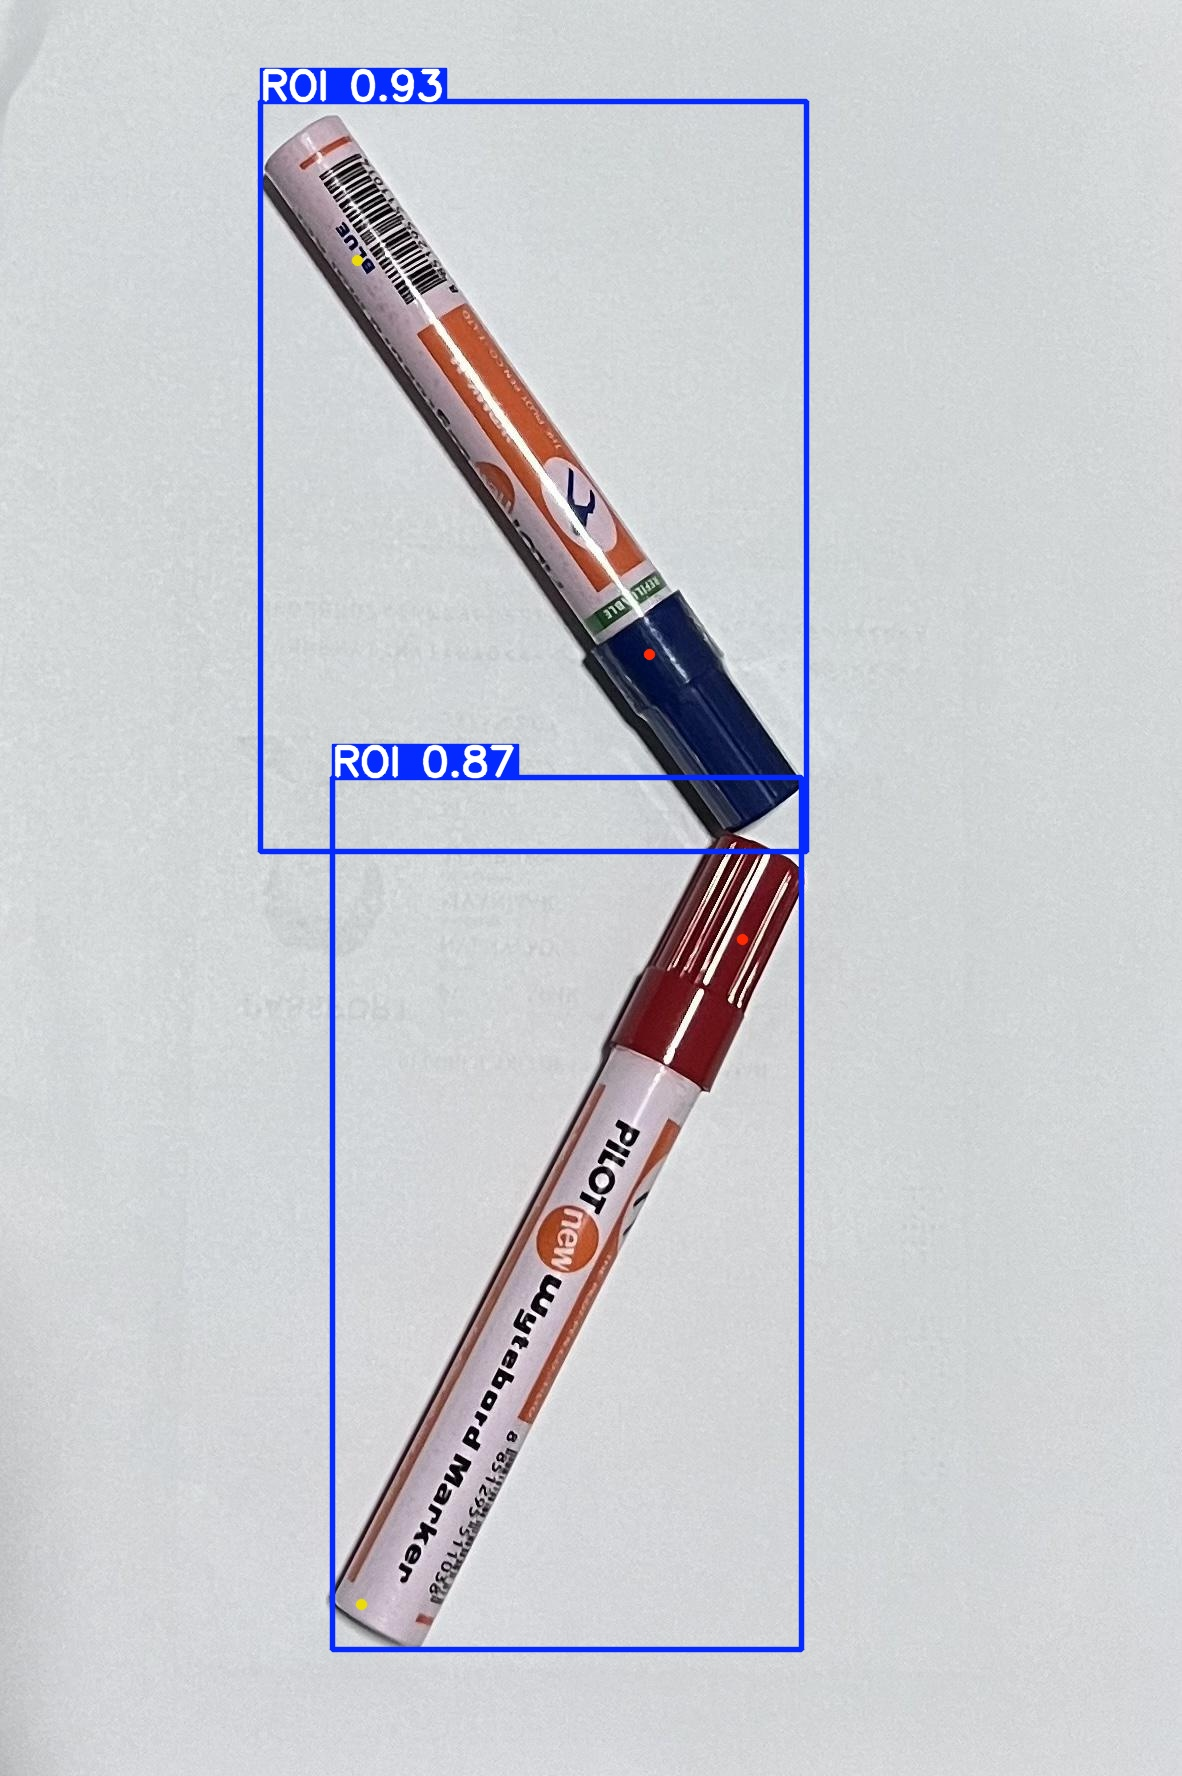

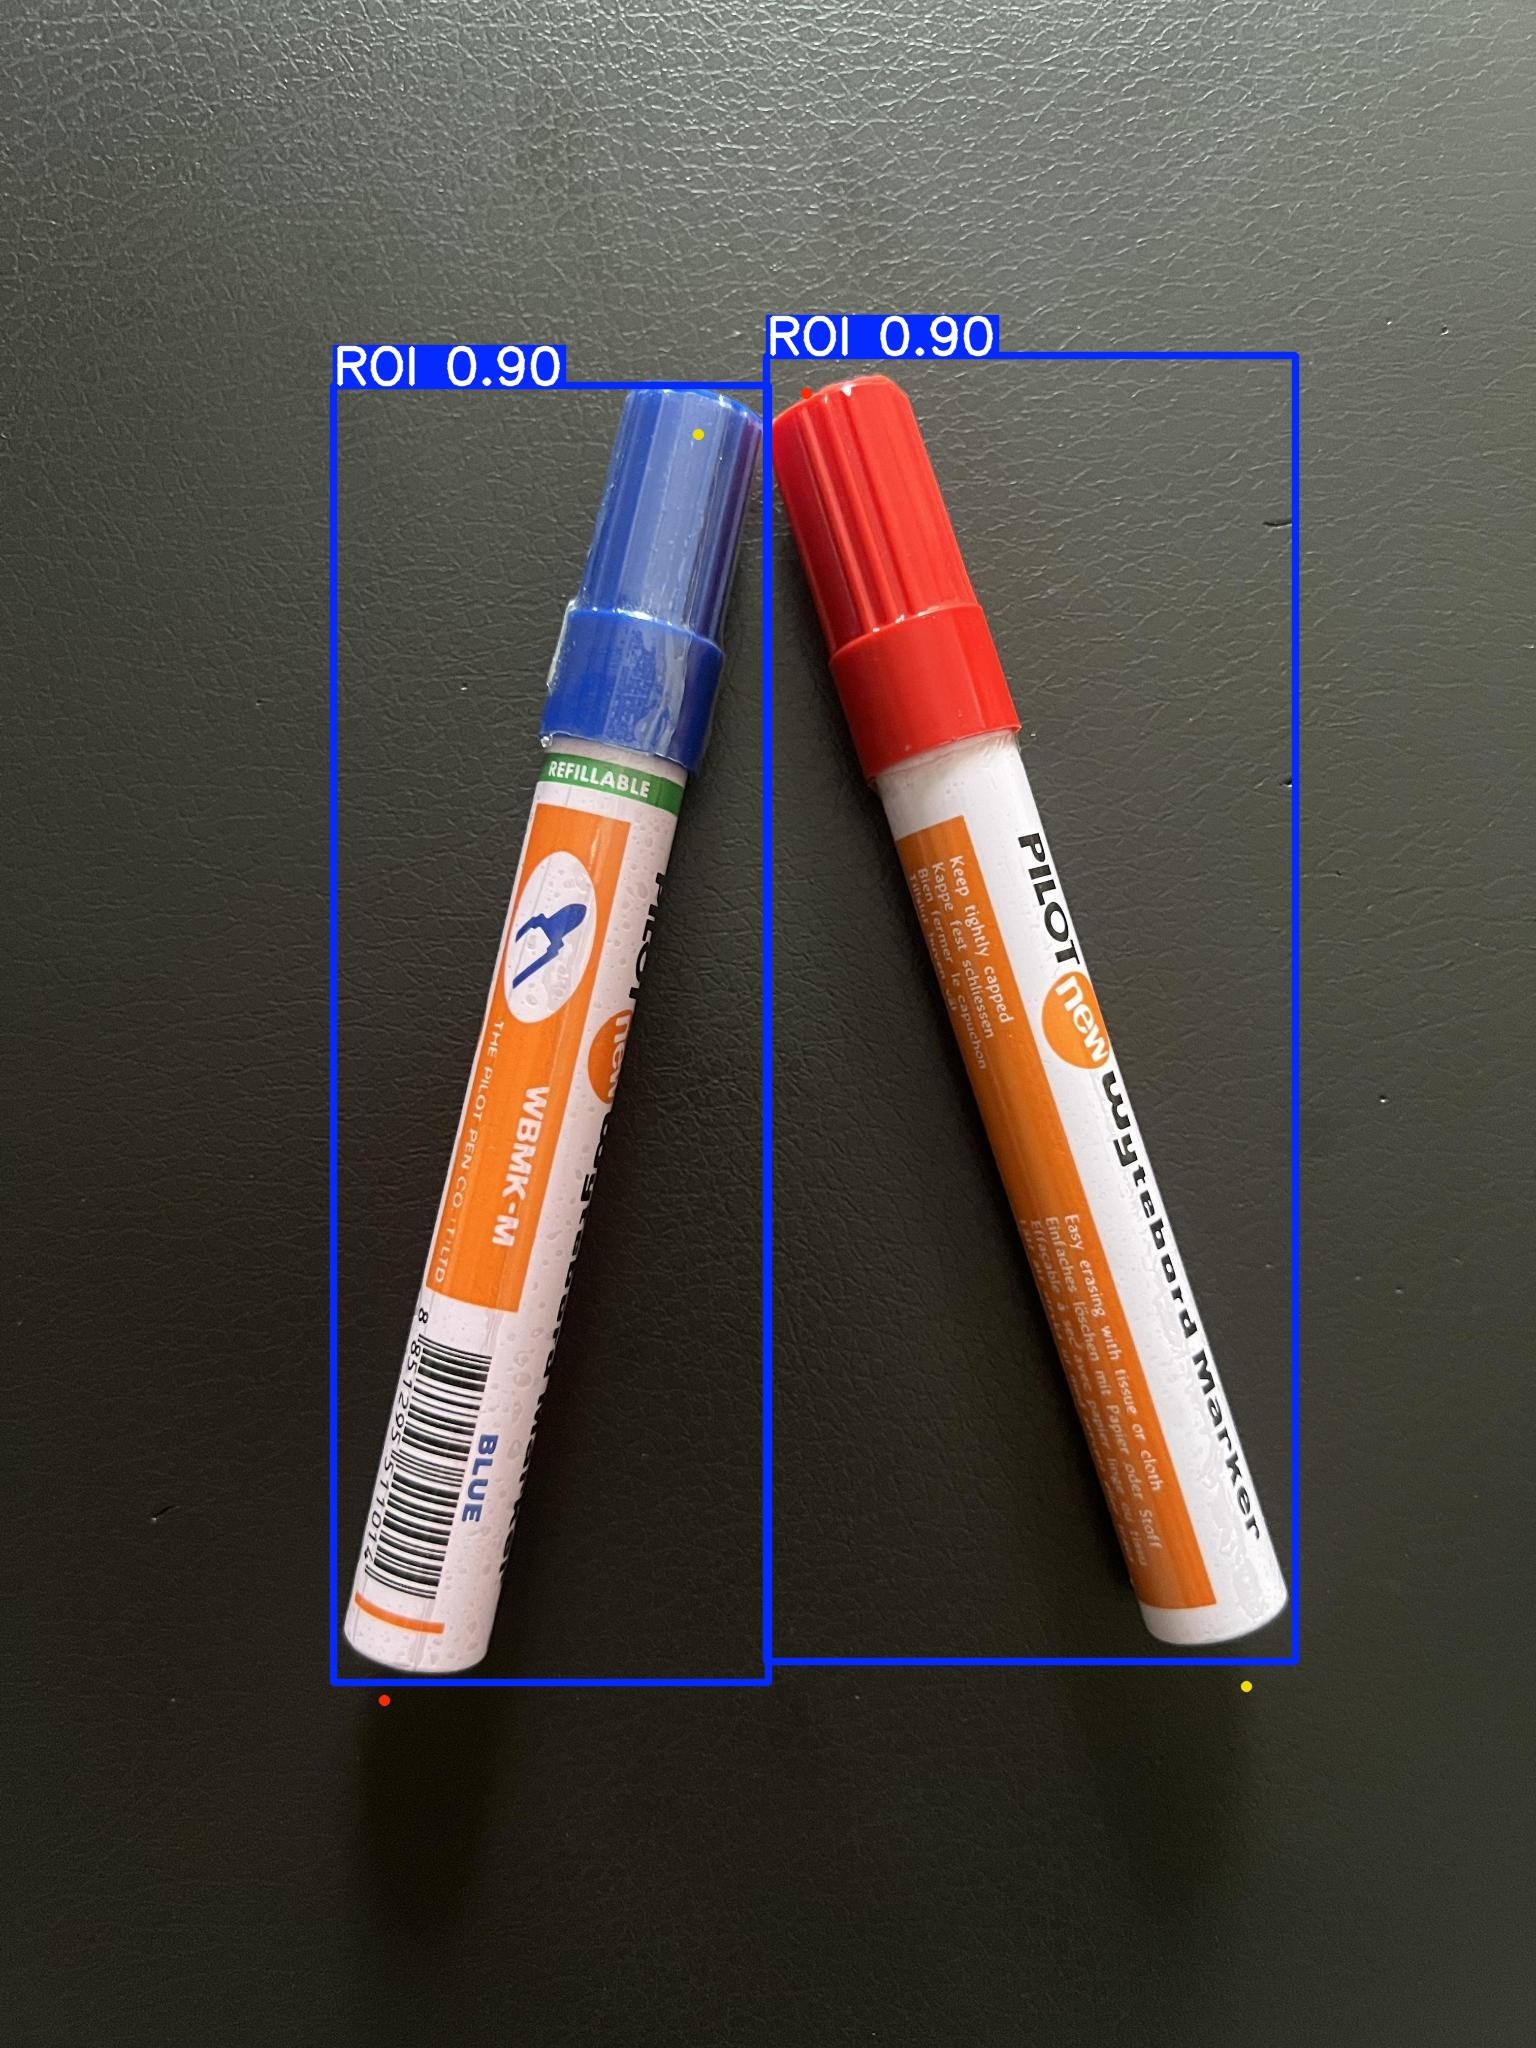

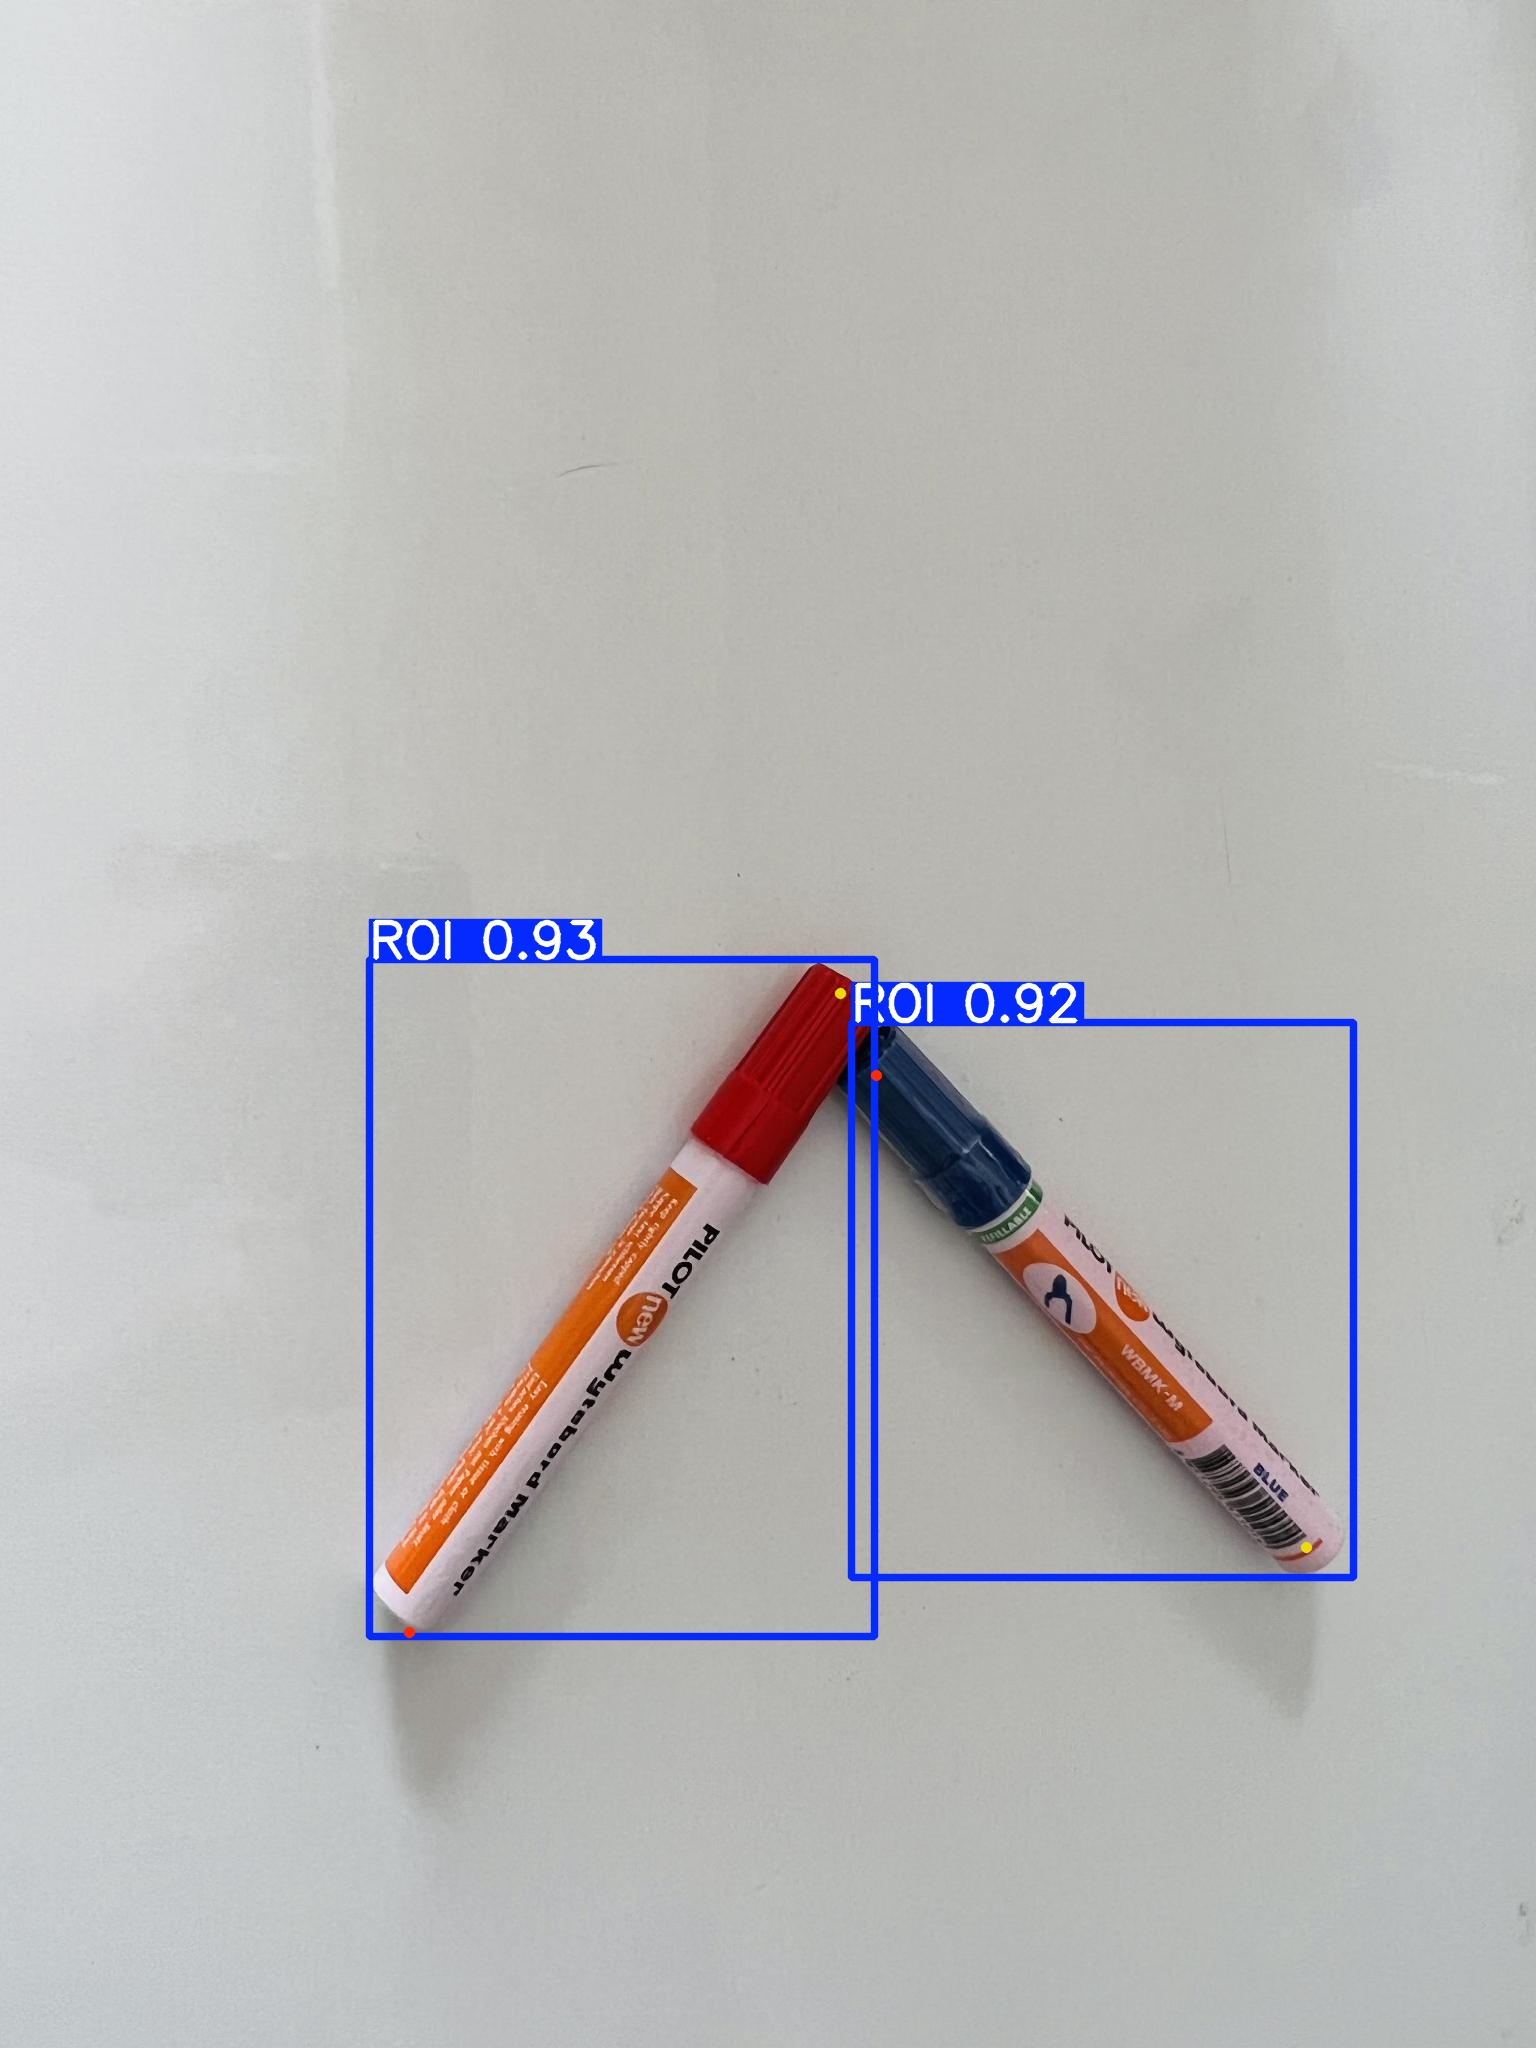

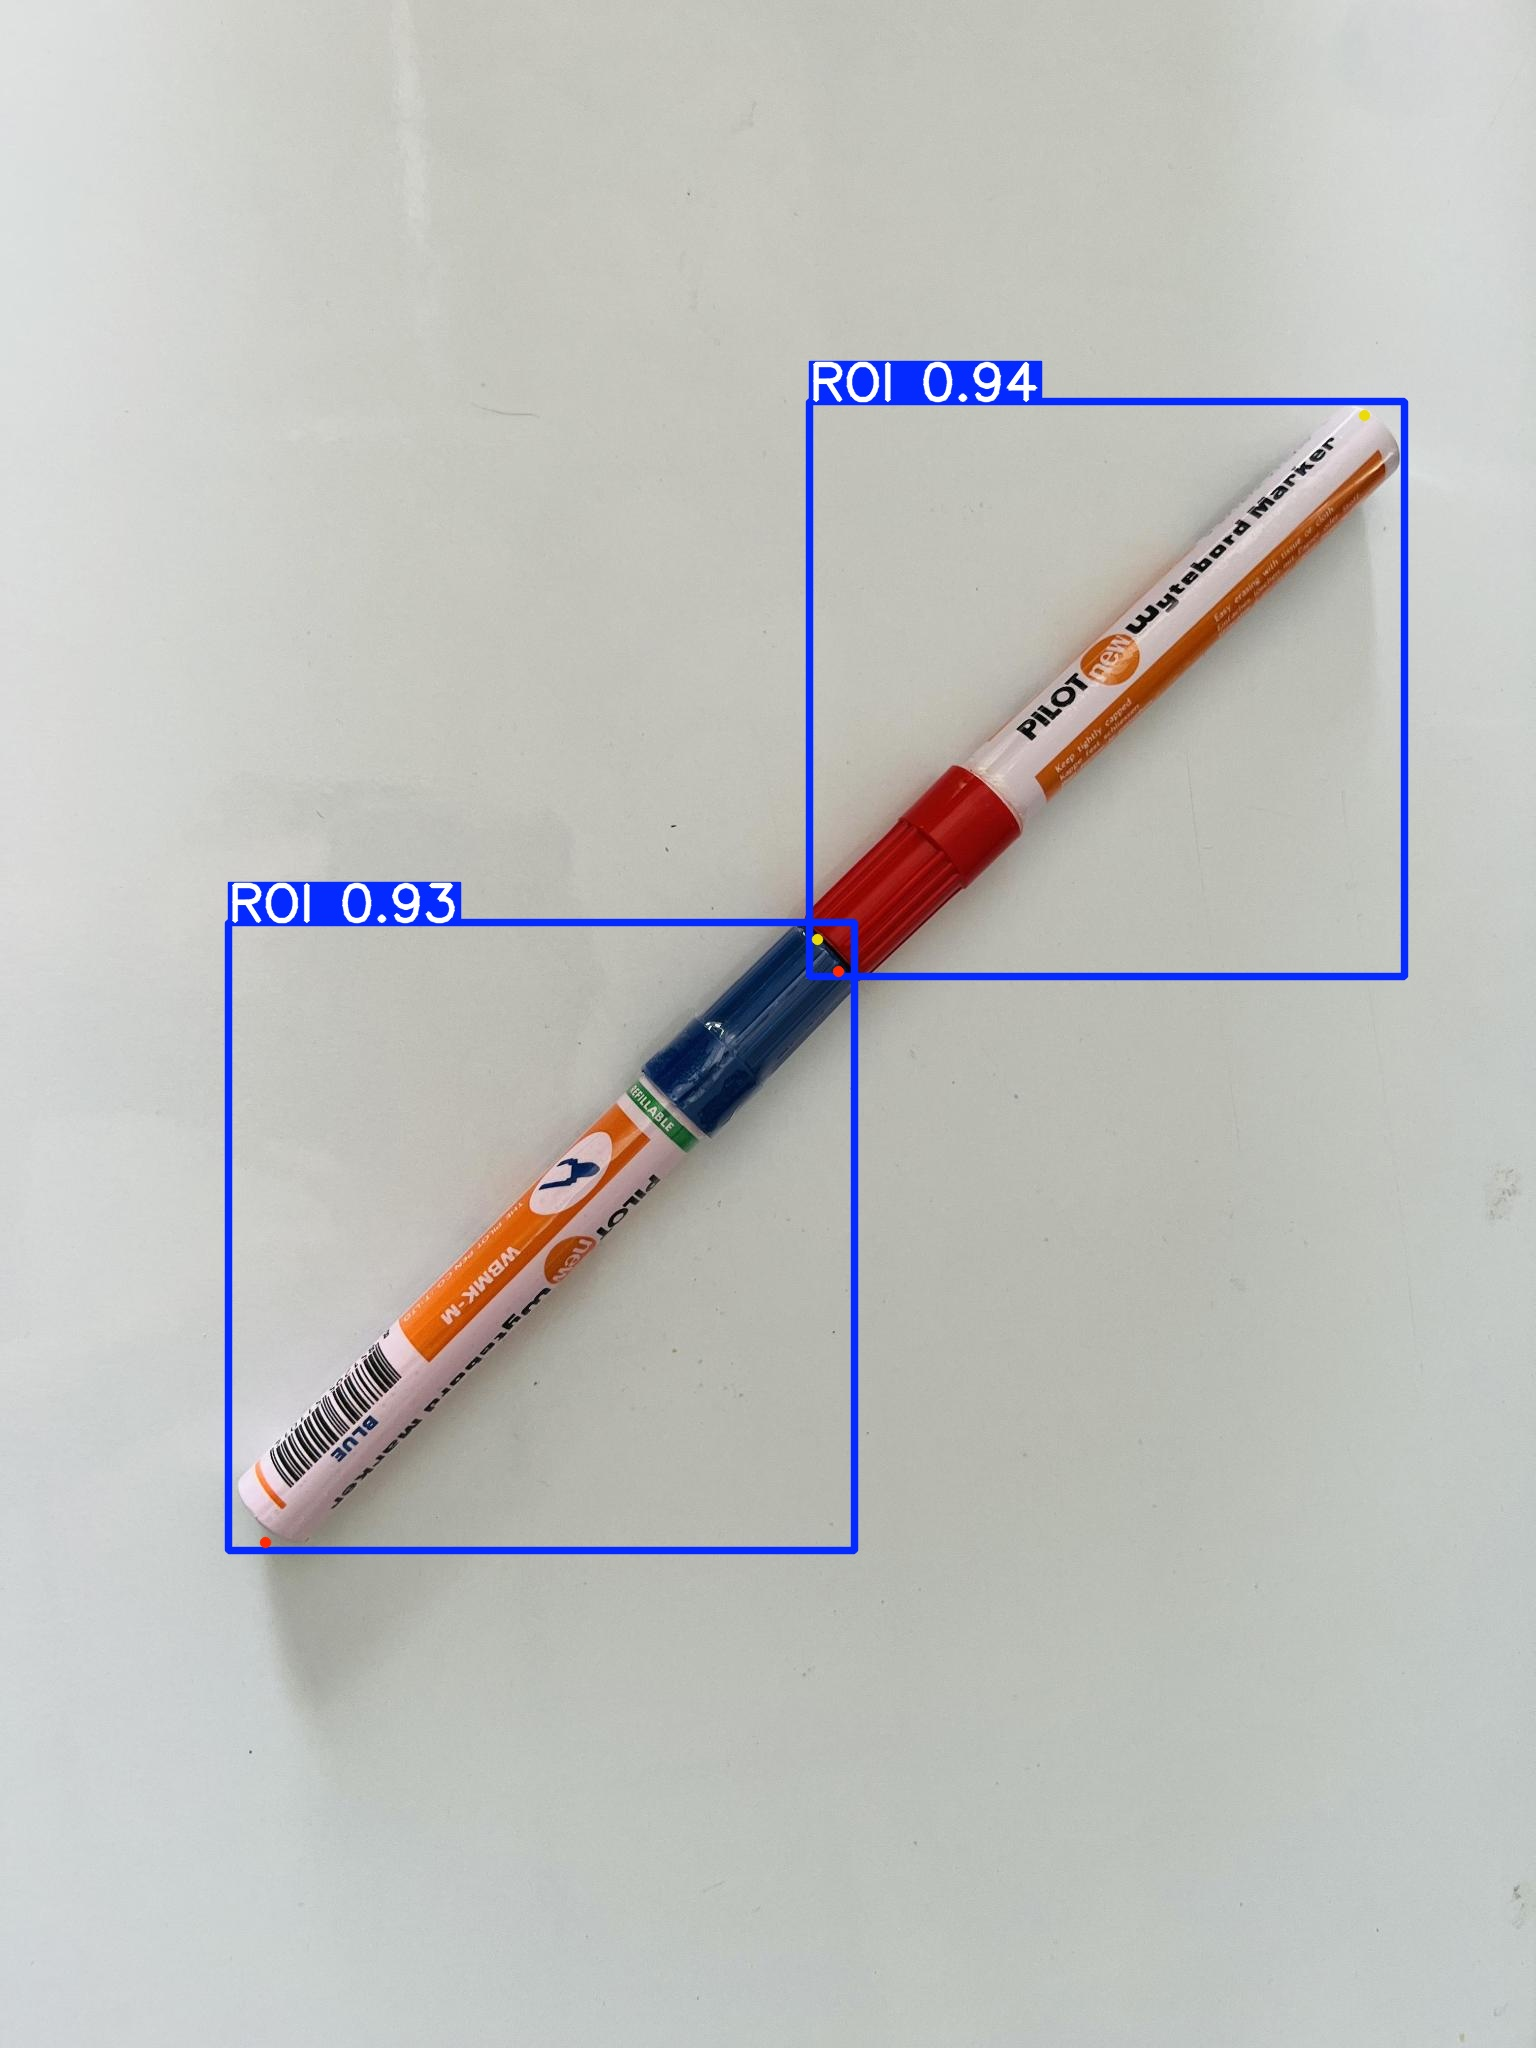

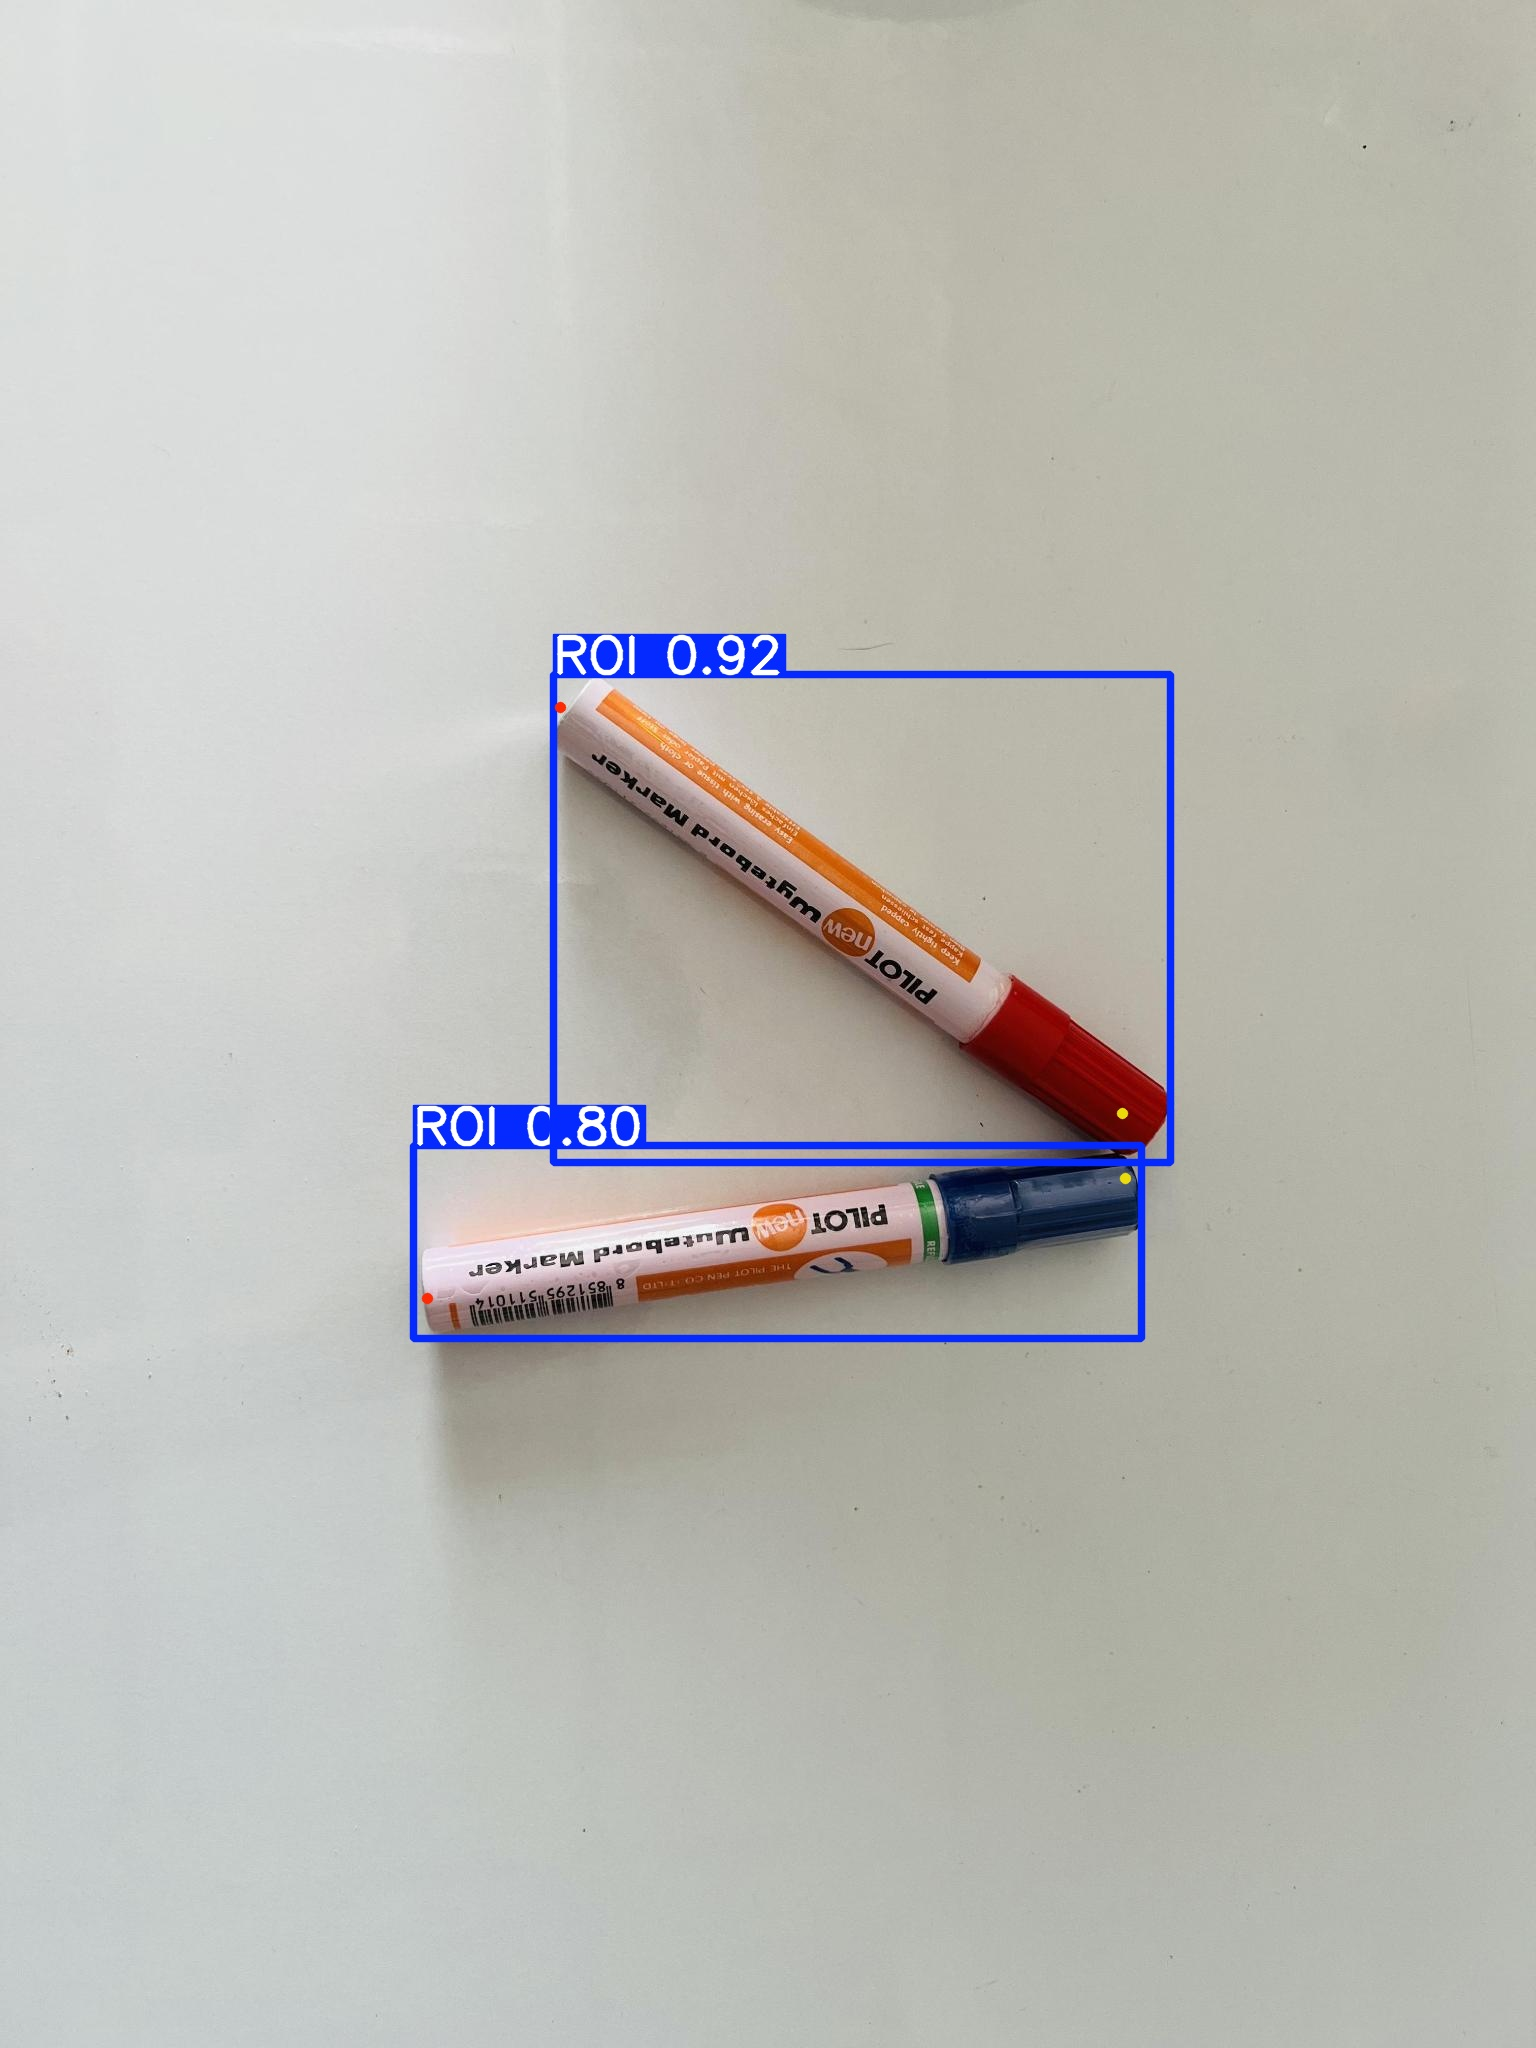

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/pose/predict2/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")